In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os, sys

sys.path.insert(0,'../scripts/tools_for_VAE/')
import tools_for_VAE
from tools_for_VAE import utils, plot

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

import warnings
warnings.filterwarnings("ignore")


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.



In [2]:
#%run ../scripts/Images_generation/cosmos_generation.py

In [12]:
training_or_test = 'test'
data_dir = '/sps/lsst/users/barcelin/data/single/PSF_lsst_O.65/independant/' #+ training_or_test
root = 'galaxies_COSMOS'

In [4]:
dfs = []
for i in range(1):
    dfs.append(pd.read_csv(os.path.join(data_dir, root+'_{}_data.csv'.format(i))))
df = dfs[0]
for df2 in dfs[1:]:
    df = df.append(df2)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
nb_blended_gal                1000 non-null int64
SNR                           1000 non-null float64
SNR_peak                      1000 non-null float64
redshift                      1000 non-null float64
moment_sigma                  1000 non-null float64
e1                            1000 non-null float64
e2                            1000 non-null float64
mag                           1000 non-null float64
closest_x                     1000 non-null float64
closest_y                     1000 non-null float64
closest_redshift              1000 non-null float64
closest_moment_sigma          1000 non-null float64
closest_e1                    1000 non-null float64
closest_e2                    1000 non-null float64
closest_mag                   1000 non-null float64
blendedness_total_lsst        742 non-null float64
blendedness_total_euclid      742 non-null float64
blendedness_cl

In [5]:
df.head()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
0,4,64.340377,0.103342,0.7034,1.823613,-0.181514,-0.141669,26.020337,-0.677484,0.766923,1.1978,2.409835,-0.163843,0.033791,26.398395,0.152773,0.094328,0.287083,0.063947
1,4,81.830286,0.116912,0.4457,2.085246,-0.308388,-0.082976,25.619027,-0.669200,0.151588,2.4798,1.728886,-0.141783,-0.878044,26.971473,0.231968,0.093748,0.448752,0.130948
2,1,78.083652,0.106187,0.3728,2.304109,-0.082785,-0.793132,25.521063,0.000000,0.000000,0.3728,2.304109,-0.082785,-0.793132,25.521063,NaN,NaN,NaN,NaN
3,4,115.974912,0.148479,0.3337,2.401302,-0.902628,-0.088482,25.067413,0.254044,0.725028,1.3376,2.738180,-0.155073,-0.577367,28.236444,0.081946,0.118801,0.595540,0.357478
4,1,2.976337,0.004598,1.1844,1.934414,0.195595,-0.905949,29.051891,0.000000,0.000000,1.1844,1.934414,0.195595,-0.905949,29.051891,NaN,NaN,NaN,NaN


In [6]:
df.describe()

,nb_blended_gal,SNR,SNR_peak,redshift,moment_sigma,e1,e2,mag,closest_x,closest_y,closest_redshift,closest_moment_sigma,closest_e1,closest_e2,closest_mag,blendedness_total_lsst,blendedness_total_euclid,blendedness_closest_lsst,blendedness_closest_euclid
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,742.000000,742.000000,742.000000,742.000000
mean,2.47600,106.562028,0.157576,0.917621,2.109615,-0.009534,0.015518,26.081246,-0.038628,0.038738,1.156823,1.897937,-0.014441,0.002912,27.262520,0.101205,0.065245,0.267656,0.108724
std,1.11475,192.388099,0.291902,0.696744,0.514672,0.435984,0.429831,1.406997,0.735623,0.749064,0.725612,0.366773,0.474961,0.484102,1.023273,0.110420,0.111554,0.249243,0.173591
min,1.00000,1.493317,0.002213,0.030000,1.510311,-1.226490,-0.980704,20.747193,-1.943682,-1.968062,0.040600,1.503278,-1.280087,-2.105799,21.643046,0.000351,0.000008,0.005448,0.000055
25%,1.00000,23.969732,0.036001,0.414500,1.741423,-0.327144,-0.273538,25.280674,-0.459943,-0.383159,0.656150,1.652922,-0.367226,-0.346872,26.835691,0.019291,0.003255,0.058820,0.004055
50%,2.00000,45.605853,0.065984,0.730350,1.965040,0.001407,0.010875,26.267225,0.000000,0.000000,0.990800,1.784145,-0.004586,0.006288,27.392729,0.059039,0.016903,0.190797,0.031713
75%,3.00000,96.211702,0.132818,1.166250,2.311456,0.282923,0.324300,27.082682,0.329086,0.497726,1.466950,2.013251,0.313028,0.371155,27.885284,0.141144,0.077698,0.408465,0.131159
max,4.00000,2064.494431,3.046179,4.572700,5.077911,0.988600,1.165912,29.660509,1.947360,1.947987,4.572700,5.064169,1.026726,1.265111,29.792827,0.583371,0.806100,0.966236,0.899268


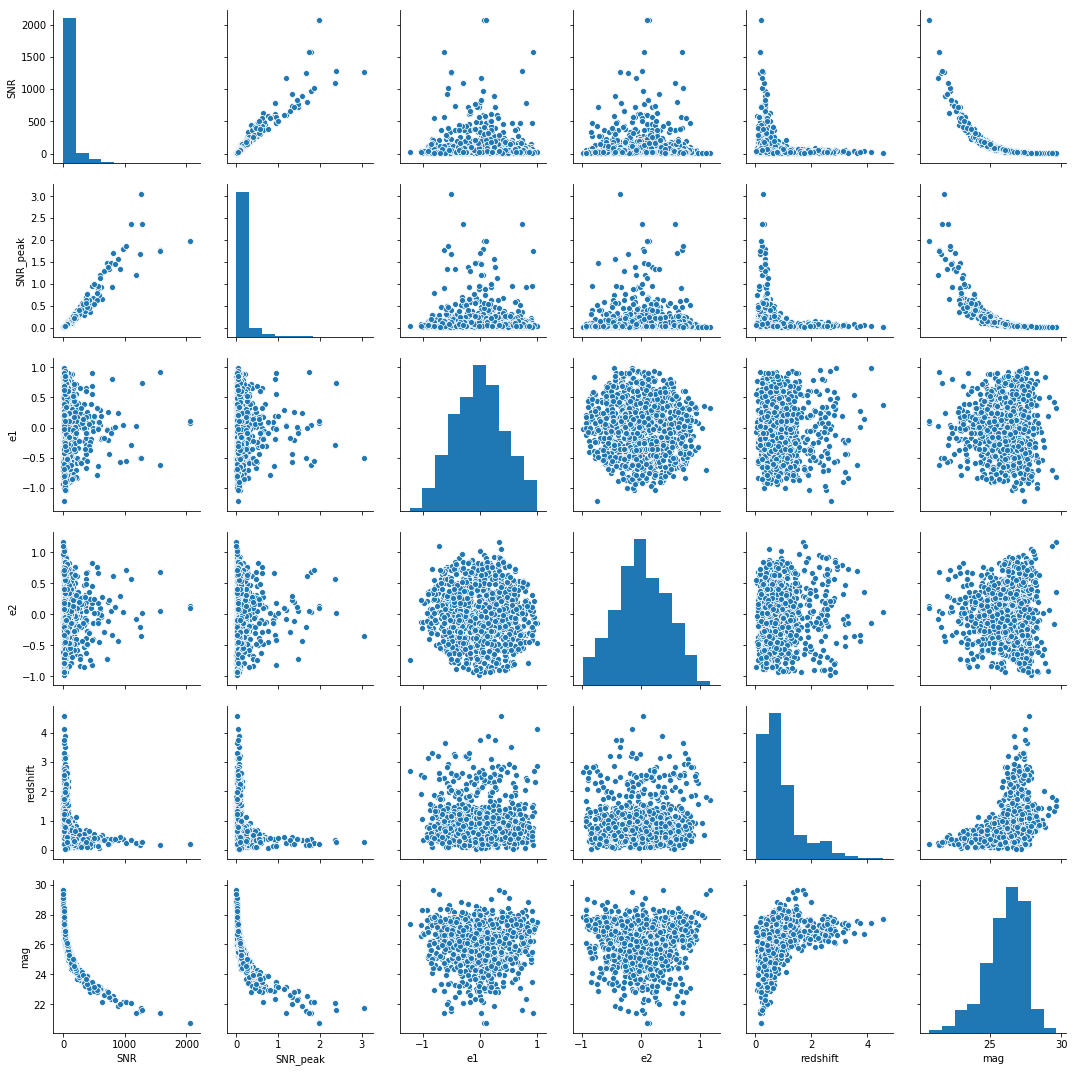

In [8]:
sns.pairplot(df, vars=['SNR', 'SNR_peak', 'e1', 'e2', 'redshift', 'mag'])

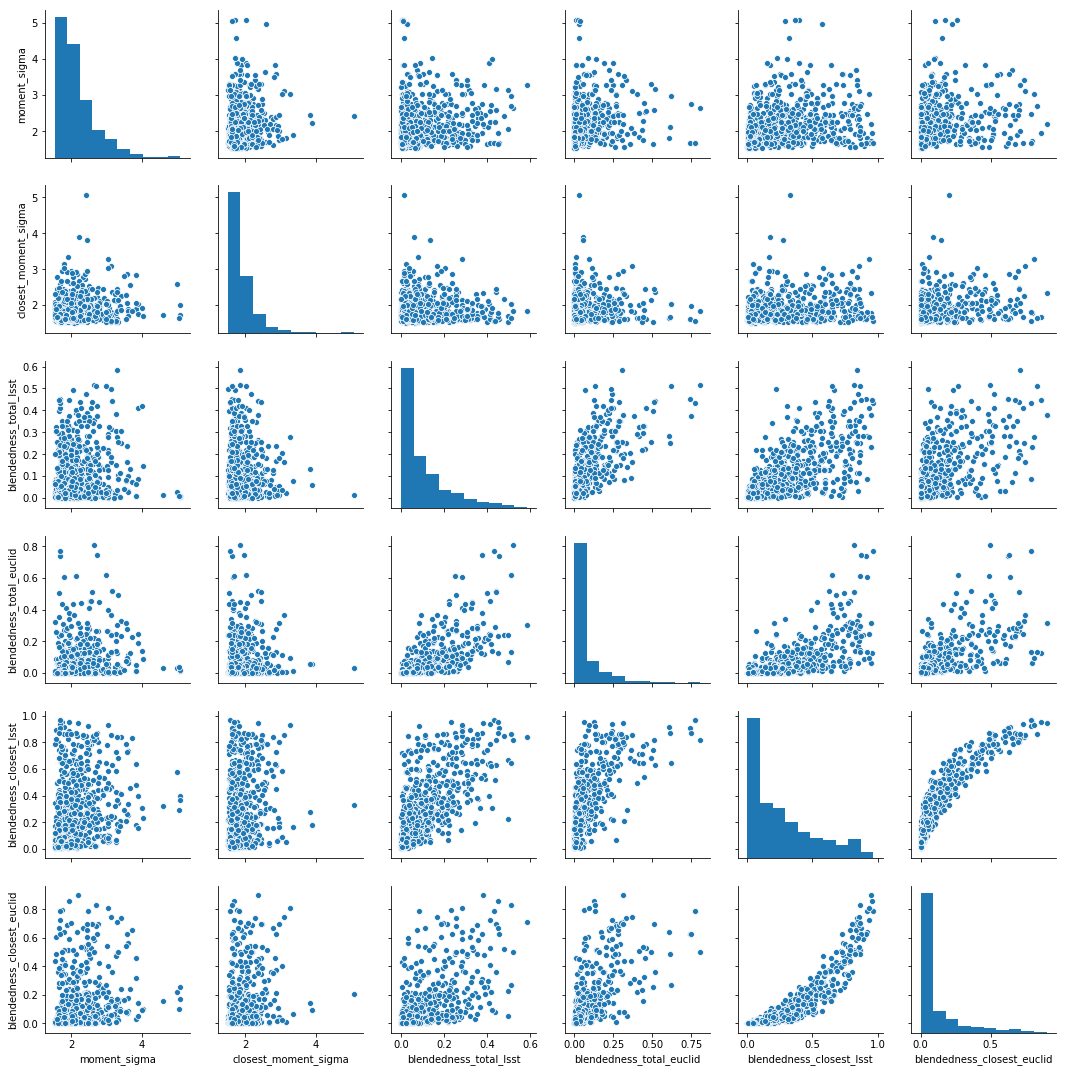

In [9]:
sns.pairplot(data=df.dropna(), vars=['moment_sigma', 'closest_moment_sigma', 'blendedness_total_lsst', 'blendedness_total_euclid', 'blendedness_closest_lsst', 'blendedness_closest_euclid'])

Text(0.5, 0, 'SNR')

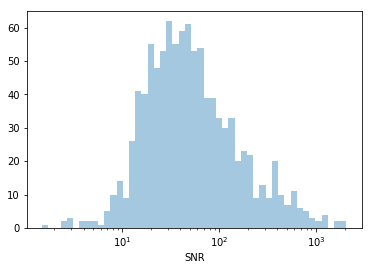

In [10]:
sns.distplot(df['SNR'], bins=np.geomspace(np.min(df['SNR']), np.max(df['SNR']), 50), kde=False)
plt.xscale('log')
plt.xlabel('SNR')

In [13]:
i = 0
galaxies = np.load(os.path.join(data_dir, root+'_{}_v5_test.npy'.format(i+1)))
#_ = utils.norm(galaxies[:,0], bands=range(10), channel_last=False)
#_ = utils.norm(galaxies[:,1], bands=range(10), channel_last=False)
#shifts = np.load(os.path.join(data_dir, root+'_{}_shifts.npy'.format(i)))

In [9]:
galaxies.shape

(40000, 2, 10, 64, 64)

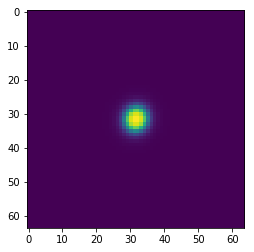

In [13]:
plt.imshow(galaxies[0][0][6])

In [14]:
import galsim

In [15]:
PSF = galsim.Kolmogorov(fwhm=0.65)
r_band = 6
pix_scale = 0.2
count = 0
#final_epsf_image = PSF.drawImage(scale=0.2)

psf_image = PSF.drawImage(nx=64, ny=64, scale=0.2)
e = []

for i in range(len(galaxies)):
    try : 
        gal_image = galsim.Image(galaxies[i][0][r_band,:,:])
        gal_image.scale = pix_scale

        # Measurements of shapes
        res = galsim.hsm.EstimateShear(gal_image, psf_image)
        e_beta_in = [res.observed_shape.e]
        print(e_beta_in)
        e.append(e_beta_in)
    except :
        print('erreur')
        count += 1
        pass
    continue
e_beta = np.array(e)

[0.23549666655288973]
[0.04292543576997573]
[0.060859926617202714]
[0.0860842423872963]
[0.18349147002932198]
[0.07339807002060837]
[0.09484705114469466]
[0.19104579445914324]
[0.18305718026158924]
[0.21646362465636124]
[0.030063480863575576]
[0.26683802178237226]
[0.07034266201305467]
[0.39807764873645585]
[0.10479049945922159]
[0.1236851922839433]
[0.4389614575721898]
[0.04187961476202698]
[0.2685513463280604]
[0.2602335187381449]
[0.20672003676554598]
[0.06586769128478458]
[0.38500049088366467]
[0.19067318857233936]
[0.03515482380720991]
[0.3295607506132067]
[0.1301319665068936]
[0.19523237863770904]
[0.055481746999744196]
[0.3751035211291976]
[0.13142038444541806]
[0.27536225190867836]
[0.2745737313048889]
[0.2906943545060494]
[0.24467826404393975]
[0.34864329137497463]
[0.32918079188858873]
[0.6201440939181159]
[0.17891851594810101]
[0.3171999391629612]
[0.12042562753823834]
[0.13109542392520493]
[0.40175390798075855]
[0.14362510683798774]
[0.25016206443534494]
[0.0794421870568323

[0.0713534032538706]
[0.07879453076997499]
[0.2801075868862377]
[0.10929882330212336]
[0.480627537229005]
[0.12054827390468324]
[0.1264365406323135]
[0.25848326108765307]
[0.1217905291903366]
[0.2917662065485765]
[0.08112759389249921]
[0.17012301263308593]
[0.3678309742263003]
[0.12809684024890342]
[0.1221967647125324]
[0.06355081200696175]
[0.5405027562408288]
[0.1203967054635831]
[0.2925663848409188]
[0.046729397131324145]
[0.06174110706655343]
[0.09094715676572536]
[0.21472398543901286]
[0.03724068518097241]
[0.12867465272464834]
[0.11878757903991524]
[0.13577561205003577]
[0.12785463607513628]
[0.3786998121202244]
[0.17896550476717402]
[0.02550716322079931]
[0.40741036830019545]
[0.10957202874653427]
[0.37893157048688686]
[0.5458852946818992]
[0.11808251481021383]
[0.32116542402401116]
[0.3485880105866853]
[0.2503053079088623]
[0.16384764842554927]
[0.10786994701066675]
[0.07174466420290976]
[0.1445671449107075]
[0.31610420483928986]
[0.06378768547685185]
[0.10134260817091159]
[0.1

[0.3617679311365477]
[0.12107407700667505]
[0.13381285025113548]
[0.1224087368206271]
[0.15899752427843167]
[0.4428448565032707]
[0.08782560712172416]
[0.08338316827120018]
[0.19664148791823852]
[0.07835982518362752]
[0.08096518645955889]
[0.2971530497780563]
[0.4388898676487585]
[0.41088632241575523]
[0.11322246576964268]
[0.18790273604359695]
[0.06920769278077758]
[0.19167665900138808]
[0.15840636768751157]
[0.3315077826565586]
[0.2203739830843638]
[0.2009242193184403]
[0.08495383406773997]
[0.32659192710204227]
[0.06283542594114333]
[0.46893580496288445]
[0.22166986590134125]
[0.05915541532579855]
[0.2076776412951608]
[0.15018600407878208]
[0.11135680380758611]
[0.1140612274257326]
[0.2275041935796082]
[0.2132417612156858]
[0.08062691062115097]
[0.3727789252474932]
[0.11097207630924304]
[0.04888004175773505]
[0.06947623597557546]
[0.21325425837257783]
[0.14574262782632402]
[0.061739362574017485]
[0.05238805978210508]
[0.0860471078685039]
[0.10729975041628118]
[0.07237292478541286]
[

[0.01126283709991817]
[0.12016828280539447]
[0.17818100221213506]
[0.1788762740937978]
[0.2451556857446775]
[0.03832241529560468]
[0.062344705317830526]
[0.16489399931529]
[0.019724967018080377]
[0.3005048848432673]
[0.2859126418333864]
[0.3824948288862512]
[0.2787933985384048]
[0.2652192488555675]
[0.055870297114509665]
[0.3645052119125369]
[0.41134140644734213]
[0.2426517505105219]
[0.13801626512018195]
[0.030025525234614527]
[0.05472366813992268]
[0.17736905828140892]
[0.17050635566087965]
[0.29334890621723675]
[0.1954153396465735]
[0.2212023498175286]
[0.157100323174402]
[0.281259308107731]
[0.04887311541931509]
[0.231571666606247]
[0.07474567168167592]
[0.44255437071132736]
[0.505206488179044]
[0.406300907921303]
[0.20499622969960402]
[0.27096335154961126]
[0.0473532183636515]
[0.09886373578711524]
[0.44365159273810145]
[0.15770076647837492]
[0.29442205437098345]
[0.2083125329049163]
[0.2613959950201191]
[0.08404825822717785]
[0.16955405043792895]
[0.07032895231858008]
[0.47528785

[0.1807618871610237]
[0.22517177124861296]
[0.23326022494399062]
[0.07644195474310873]
[0.07245784927370816]
[0.07869358064066961]
[0.1775602431133453]
[0.473599178824531]
[0.06267274439318844]
[0.2630069493333365]
[0.11053500340750684]
[0.1110698913384743]
[0.09003845965017715]
[0.4256413632675705]
[0.20133395476831498]
[0.3100630550443537]
[0.0411916069910089]
[0.14368358505046847]
[0.3668876501539376]
[0.1895469494170117]
[0.05718822611376527]
[0.4790961879301764]
[0.056950925740618094]
[0.308253038482898]
[0.03748750883907467]
[0.07654610180522595]
[0.32859220986114757]
[0.10178105759571571]
[0.24438128560393452]
[0.14149900400232057]
[0.3332862985401321]
[0.14168537244479631]
[0.2482712216420732]
[0.031194309051743023]
[0.33933784618617147]
[0.22394733109781506]
[0.43801911702780344]
[0.1501899162582927]
[0.17664232336854097]
[0.14686967611702662]
[0.11148366752655972]
[0.22999206035621267]
[0.09684990884527149]
[0.12395442823360124]
[0.16055858199601097]
[0.09906806599861807]
[0.

[0.1795109504326921]
[0.8101464866945104]
[0.009923040110656887]
[0.06232724960984037]
[0.29385265783251213]
[0.02267192965419979]
[0.08535481404650141]
[0.18926155514279924]
[0.10847592262029308]
[0.5237154955829149]
[0.020532216367132518]
[0.1838308485712406]
[0.22277793729375062]
[0.11396458544962737]
[0.1412688308556519]
[0.17848523967476715]
[0.5569467525803852]
[0.5317879156223215]
[0.07521276453961617]
[0.33808965101843774]
[0.10441595105666704]
[0.03848549284026489]
[0.15840849825340908]
[0.11589905868428782]
[0.04025285027503856]
[0.06830367098654165]
[0.05090133124332712]
[0.23937445887452866]
[0.11505134895450658]
[0.36613806513807945]
[0.09187299571482231]
[0.20828040466890319]
[0.40902780598871025]
[0.18847208587100125]
[0.42899700088462356]
[0.4725099727881597]
[0.05967859978684442]
[0.18840468863684362]
[0.08984455125081564]
[0.12623300522378594]
[0.07036721781215344]
[0.07854166514634572]
[0.46311580278361403]
[0.39215774151539007]
[0.15345395812729948]
[0.2090580739785

[0.174713696194696]
[0.10189738901050997]
[0.06427982985971988]
[0.13763504484067485]
[0.1591787806687803]
[0.172201079292562]
[0.06129313093147488]
[0.1511988523896748]
[0.03267971407397425]
[0.36309289146251755]
[0.6613810814584128]
[0.08777493346421851]
[0.6141908797137906]
[0.18836334265759613]
[0.3344118365275458]
[0.05523489236177405]
[0.1622106297286196]
[0.10491019650839407]
[0.1900914693609128]
[0.5652536926312325]
[0.039898786224236496]
[0.3193741804082293]
[0.08942624794671049]
[0.04566274093098725]
[0.4159259007243425]
[0.28414309675047783]
[0.09266170349143053]
[0.16498217517640107]
[0.10895179089747163]
[0.5098832179388307]
[0.08300417273415632]
[0.02597552372270272]
[0.06212348088637399]
[0.17097732251302164]
[0.2681193402280952]
[0.24329214104781666]
[0.10139711531523178]
[0.25205342266868436]
[0.27981198489582054]
[0.29262438565581106]
[0.08841199657519175]
[0.08933155486555314]
[0.3765614710359438]
[0.27512341570055243]
[0.2074304046249951]
[0.1861844722243213]
[0.169

[0.278949769565866]
[0.44371037044912637]
[0.3563264285860901]
[0.09663418816982827]
[0.22265276469215398]
[0.19264916982365338]
[0.12233984561168533]
[0.053770269249229855]
[0.28345159051484115]
[0.386058866360167]
[0.07298710428281971]
[0.3959495585587845]
[0.2826513914915654]
[0.21118473052735773]
[0.10927759147429628]
[0.16020060216354148]
[0.036805738322544315]
[0.10629601420631832]
[0.01616149398865707]
[0.054137366494700724]
[0.050712779952662546]
[0.07952910357199505]
[0.10127498342285218]
[0.26137754973280264]
[0.10212175685595096]
[0.19811978594368043]
[0.2663880954786587]
[0.46729963911905115]
[0.07235274905091454]
[0.015598103473813081]
[0.14928924265744795]
[0.10350678027203822]
[0.07604321574369696]
[0.44178138037878845]
[0.2578174638210919]
[0.4241057859255615]
[0.06329560038075632]
[0.46128073056096847]
[0.11269542003864744]
[0.15725648425373404]
[0.28016239160481704]
[0.3515748286163735]
[0.01758557151450558]
[0.2793069981319972]
[0.22433550920523687]
[0.33744676462274

[0.1362526023112891]
[0.3032909240934959]
[0.12465878143648433]
[0.32098837965560156]
[0.2897524988907987]
[0.35361328952779336]
[0.36527229441218934]
[0.2081792687004331]
[0.15727117909084518]
[0.2915687131121568]
[0.12819646745953553]
[0.3973477167014198]
[0.17943900643496918]
[0.40616671410316063]
[0.03056482373231848]
[0.045657857924338276]
[0.04527212817041519]
[0.049407189016278615]
[0.25013054470452767]
[0.3334916796169029]
[0.04054832883832636]
[0.10727836083477783]
[0.18744264649348372]
[0.18863239490106987]
[0.2943929331608376]
[0.3494279078957275]
[0.14281253657649964]
[0.3069132516310834]
[0.07705842864979373]
[0.20446269621816526]
[0.6364003535984883]
[0.6020772868175455]
[0.4344982818146362]
[0.05148881921986562]
[0.051344251305336264]
[0.30458518980857413]
[0.5148299734869111]
[0.27144741007780354]
[0.05427754351337132]
[0.1661590268258976]
[0.42658682566180167]
[0.4019066813120938]
[0.07064911428344259]
[0.12727065355221737]
[0.2276398027359653]
[0.3827895304780705]
[0.

[0.1433724515259669]
[0.07485849771675197]
[0.3256541009900202]
[0.2427427406172165]
[0.23488491135958384]
[0.1766689717626181]
[0.2480051226154232]
[0.0607307033604556]
[0.10552427539816325]
[0.7072639912245493]
[0.16499246931340955]
[0.25954445074646654]
[0.07552657255903468]
[0.09610170700394915]
[0.250182695298383]
[0.11105200157023114]
[0.33122491331065546]
[0.2498560245888273]
[0.43738842317576804]
[0.02098005417199203]
[0.5656760374083831]
[0.28302231537938344]
[0.03435495509786765]
[0.30374078602729926]
[0.1220725048363062]
[0.37795069907536444]
[0.4246257596328633]
[0.2601530315280123]
[0.08597474796005265]
[0.19755730751236972]
[0.07336718780886707]
[0.6595130553071331]
[0.0327055349333146]
[0.15675914917587636]
[0.19237541663403304]
[0.09173694572663267]
[0.2174748904186016]
[0.06166064839032748]
[0.09169922393692245]
[0.019283502450848946]
[0.11733380940181826]
[0.19479726282581827]
[0.27280823870566207]
[0.285275311958465]
[0.012129109289045962]
[0.4664446617105919]
[0.330

[0.1235179009512491]
[0.22684859495996215]
[0.35027054385907924]
[0.23219574055813255]
[0.12304835248212444]
[0.2684663704333678]
[0.2483119404215142]
[0.06511253217787939]
[0.13122292933722796]
[0.09098434134489221]
[0.32538977303410277]
[0.18671022265904977]
[0.17579199823203703]
[0.20147941630461927]
[0.23736951224246983]
[0.038890527869436094]
[0.030158430670109846]
[0.2327686839796083]
[0.06116608428036987]
[0.07002533363125633]
[0.10237783815694905]
[0.5442520571511049]
[0.4135150429574611]
[0.5647468017038558]
[0.5051009143418093]
[0.14524596631359932]
[0.041933933990074564]
[0.11030802385985641]
[0.03707153322799663]
[0.24255110313772899]
[0.413207693144463]
[0.17097017396309266]
[0.036423370446915765]
[0.24382862795135868]
[0.07098997711080843]
[0.03389835243470886]
[0.2632548128265859]
[0.06204353368353873]
[0.09863161364115296]
[0.09457161590808413]
[0.300953548108458]
[0.25649285208638467]
[0.2859564141744755]
[0.023907264565140748]
[0.25277125578699716]
[0.1815438213284945

[0.26118157360514455]
[0.1310288132107348]
[0.18646888033598177]
[0.22543348526420764]
[0.4121940290545444]
[0.1466920794656965]
[0.20329727062168929]
[0.08142417601723338]
[0.45705287991779486]
[0.046919435188341345]
[0.1347590950370407]
[0.4081074807881616]
[0.07424088443862217]
[0.3339199828119604]
[0.15524096358766368]
[0.4942688125304073]
[0.22406926422569343]
[0.19335342566237668]
[0.2123927237580207]
[0.03861513756638578]
[0.3869015964349593]
[0.2978998458427761]
[0.07194037222493056]
[0.278298075234216]
[0.11441945944285664]
[0.22327180642796438]
[0.20912167875692828]
[0.19764612734143752]
[0.11272819121809909]
[0.24664723535417987]
[0.15722365499377464]
[0.06824849278408769]
[0.0728945495917855]
[0.2250983842707287]
[0.15445650172203507]
[0.28756116366451023]
[0.37498925218811324]
[0.10165826698344578]
[0.09149096876849502]
[0.3305022660447667]
[0.012488731068134045]
[0.28200233578769784]
[0.20182579949072846]
[0.006735782942708621]
[0.1718145638046571]
[0.42945147870625877]
[

[0.40067641401599485]
[0.11031405434080069]
[0.2026694212619933]
[0.15074887988297034]
[0.15205834043833427]
[0.2754434674689806]
[0.11429574635220781]
[0.23631407582083203]
[0.07169973146872775]
[0.5409394295501627]
[0.07216690165787544]
[0.4188239263720982]
[0.3699795926554879]
[0.043537840667900334]
[0.2546308938788221]
[0.0829530895942603]
[0.3021392250592475]
[0.47017174502612263]
[0.3067949948398344]
[0.09896612233830945]
[0.25057655895088293]
[0.10897119442571972]
[0.19267401410959778]
[0.2035533912427622]
[0.20944681643099405]
[0.10835504132241629]
[0.21210418166373177]
[0.09764121314633577]
[0.09327295783912903]
[0.050999451689543965]
[0.04401279461973275]
[0.3248815317527738]
[0.3050600072389187]
[0.25411519763118057]
[0.5557332476714228]
[0.0384757330869276]
[0.36908668661051436]
[0.21386083227575603]
[0.14033882954580792]
[0.2014225767654805]
[0.40128711540908696]
[0.32960855327946464]
[0.282147283999004]
[0.07320685027273002]
[0.4744660647584257]
[0.33590367498192153]
[0.2

[0.027970988803101886]
[0.20710003838944643]
[0.04045979804733856]
[0.10268043350197202]
[0.09074226445292848]
[0.42976551388583545]
[0.06185631330760669]
[0.11858268083717972]
[0.3333116777174262]
[0.3963898940838723]
[0.24410563448215564]
[0.06585517472804227]
[0.30844869792043206]
[0.12165219851457666]
[0.07275014382415357]
[0.25881089637436167]
[0.17872607619049666]
[0.42289456198504083]
[0.43826563384256495]
[0.1344885826771413]
[0.05839975794125893]
[0.10317052561231026]
[0.17565325895093598]
[0.01902882781465524]
[0.12373793767982112]
[0.2112404429632393]
[0.2938306722030941]
[0.603113139451051]
[0.07591873426216061]
[0.2025622854321958]
[0.20687421781409565]
[0.4255970746386777]
[0.04371756951435708]
[0.11514213016207088]
[0.10003117533154847]
[0.23315340129672574]
[0.26136340823107]
[0.28651745793864897]
[0.1260667106459991]
[0.06558871113668992]
[0.2750559561240804]
[0.3695890907828204]
[0.6414681217592096]
[0.2911266195330892]
[0.33041536129224464]
[0.11262634665042943]
[0.1

[0.3117647265372766]
[0.025462441327773956]
[0.32146045839214105]
[0.2749383016364293]
[0.26961096876988216]
[0.15661438618755008]
[0.0793681914860758]
[0.10643972914080078]
[0.1964446602618539]
[0.12152096708267823]
[0.08002461594722736]
[0.021872098253915808]
[0.2690679283115425]
[0.05681887186775056]
[0.12184224665913478]
[0.1453818839286729]
[0.28161369376676426]
[0.5014664071168229]
[0.19730545293141435]
[0.008994858773295943]
[0.08642300898452195]
[0.1575062344039481]
[0.36858332515124764]
[0.0003003050516604452]
[0.28581085415952107]
[0.18939123049985612]
[0.040518248846533385]
[0.01790485855299135]
[0.08894062936956705]
[0.3236312288266106]
[0.14284318873332455]
[0.24701392906936648]
[0.46406783056674794]
[0.20495241697503724]
[0.4160149561869064]
[0.11221080141594547]
[0.02731684442567908]
[0.228125246649016]
[0.3209315972493107]
[0.012905577020201035]
[0.0868179613017297]
[0.03074342747108154]
[0.22900807991263783]
[0.34718721947695874]
[0.6344253905944643]
[0.131276724005054

[0.1004654220974309]
[0.10460590769990345]
[0.2808038843069269]
[0.5591755485048198]
[0.3009357130100129]
[0.2533982559932934]
[0.2559371961844762]
[0.3785002113658973]
[0.047533575401847473]
[0.5302743895000613]
[0.07413732528022447]
[0.10740714146070932]
[0.09561794160990894]
[0.07813401874974972]
[0.11806092814620205]
[0.14203817491447185]
[0.4098380390444396]
[0.47553724230936356]
[0.08395701909571725]
[0.1727532717164464]
[0.24264092502687254]
[0.07410683337429529]
[0.034028137047204476]
[0.2438798346445027]
[0.3238780798867627]
[0.5368482332109079]
[0.02114634414520001]
[0.20840143719842852]
[0.12767126697403222]
[0.17178350846558105]
[0.05664333130049003]
[0.08181266444914728]
[0.04556520151081061]
[0.13132191568251608]
[0.14014370322467856]
[0.035852042363857306]
[0.5765799032905179]
[0.030464937969718626]
[0.6050116212157524]
[0.11728866113840916]
[0.1320060014189146]
[0.4550069324480687]
[0.04700366451723648]
[0.3094088526047455]
[0.022306217204365843]
[0.09880429002555664]
[

[0.35898096066379204]
[0.4743057206254139]
[0.37204659304706866]
[0.39741216947770347]
[0.028465606045865195]
[0.1785983037151725]
[0.31277266030136525]
[0.2437300554473915]
[0.11096962054049343]
[0.23180936027996182]
[0.059008339846106796]
[0.0851671586124863]
[0.024979475237728917]
[0.04809628184724337]
[0.08599648285294759]
[0.3356906128982191]
[0.15631139133035826]
[0.18184530861927903]
[0.11650869880276195]
[0.051520825297780015]
[0.4442666472069612]
[0.3018308048780058]
[0.20883265357975822]
[0.6103162084637026]
[0.1419007816860799]
[0.06255962136625517]
[0.08635975635762376]
[0.09062279143347936]
[0.000855645306763467]
[0.10396749850613467]
[0.1373276450810444]
[0.5541899781724333]
[0.08048279024802549]
[0.1700720827592357]
[0.047189242806222303]
[0.0890288739014894]
[0.5067694111180894]
[0.0882934159901233]
[0.09544742847956389]
[0.10611633902767163]
[0.2497336425054655]
[0.12917295022744457]
[0.16362616138181435]
[0.3806677445789604]
[0.006704529212013626]
[0.30045284302528785

[0.07602099780858884]
[0.13370954020203946]
[0.2511530404443867]
[0.08380290033942957]
[0.08349480816478495]
[0.1350305099048346]
[0.17609641891374078]
[0.02724025974319997]
[0.04418952292881931]
[0.07203256607056863]
[0.030183395959555798]
[0.10760136174079268]
[0.22781990397390445]
[0.02620772282039792]
[0.14888757633738461]
[0.22559110156978504]
[0.09021653494482468]
[0.13989804744568848]
[0.2477010214750957]
[0.33502142085703657]
[0.024631592821099155]
[0.2930235781469133]
[0.36058361971056124]
[0.16275825377340708]
[0.0338266274238733]
[0.12825522303528325]
[0.044812295591624106]
[0.12002787219234957]
[0.07956342178283837]
[0.001534262011979493]
[0.29545996704529504]
[0.023020299448477582]
[0.251642044113633]
[0.08563381658530582]
[0.2547299607838043]
[0.1218455629040425]
[0.14506790855850824]
[0.2244867755456605]
[0.024968021321685283]
[0.028203559019468055]
[0.10122203083644171]
[0.1342761487379747]
[0.11888541622352403]
[0.1248767752824989]
[0.20440173994344277]
[0.454557390016

[0.3652482994311682]
[0.5336709704276605]
[0.25975614212992365]
[0.34264946426891707]
[0.24824588711530254]
[0.27123359050868806]
[0.44048113187317306]
[0.10468155818601715]
[0.4768529917897584]
[0.3596638289994525]
[0.12775263025765465]
[0.38560194468497827]
[0.2744953557172366]
[0.29137368681942055]
[0.14324529222584745]
[0.3183855739650363]
[0.6839353366684638]
[0.11385152933240364]
[0.1145782153458626]
[0.33256839822780465]
[0.06984035848834996]
[0.02615019482461965]
[0.04771365858306108]
[0.1018470759537636]
[0.10645249137712576]
[0.3649579443749388]
[0.11675074431738988]
[0.10598582908429956]
[0.18200815514011764]
[0.20267697355521996]
[0.05919370023645717]
[0.047936955171921876]
[0.03523774275124933]
[0.20205652502568486]
[0.19181203945299025]
[0.256611688339547]
[0.1602408302834342]
[0.1860453068148249]
[0.505413862415416]
[0.06798645853063921]
[0.15584917542356824]
[0.28668908593616715]
[0.21066640233186598]
[0.07631134050254328]
[0.20624756344300088]
[0.2309744370352889]
[0.2

[0.49674497767940884]
[0.073711954359104]
[0.06926391182670072]
[0.5160132810498774]
[0.07554486649437125]
[0.18833754360113208]
[0.30252685234545457]
[0.1688318571081424]
[0.28418917903294527]
[0.02137872194367741]
[0.5738007796618252]
[0.2522680136712277]
[0.10504209652347848]
[0.1442601432319901]
[0.12351941502340512]
[0.1492514064044876]
[0.2059772398561864]
[0.0840138715938291]
[0.3317589416994083]
[0.21470098137024868]
[0.08770828638759887]
[0.24247393376939386]
[0.14192503087970937]
[0.14512817601024589]
[0.21317217260820978]
[0.07337769863546435]
[0.5755535683490677]
[0.28963588236323834]
[0.08296745288575656]
[0.12614249199506158]
[0.10879371022312717]
[0.10933267519168131]
[0.2744753455295414]
[0.2109686134191713]
[0.1946269799657058]
[0.18724806316844256]
[0.1991178014962459]
[0.30750753059204555]
[0.08854113260139433]
[0.04256512182608413]
[0.16284921097137697]
[0.34944788847405917]
[0.16565278559971144]
[0.4494745924314262]
[0.2993352844039396]
[0.3143379698557367]
[0.1534

[0.028494970089968274]
[0.5552863928822084]
[0.19147834235568434]
[0.36908071459475644]
[0.160327849258481]
[0.13475352810574603]
[0.31377161157892547]
[0.2712388018609729]
[0.0053628191642615805]
[0.07425722409960163]
[0.2993314766566221]
[0.14674956840397912]
[0.11953089912833889]
[0.1801560037409778]
[0.4243174727706461]
[0.12614328401767122]
[0.02393723181236344]
[0.3082005492013368]
[0.1996758666257409]
[0.04858183323080645]
[0.4767939201341865]
[0.3953795452205515]
[0.17072807891117395]
[0.029005258247615243]
[0.29799250733090044]
[0.41729383435848305]
[0.04992352048099239]
[0.31436912017643637]
[0.6714868709401612]
[0.31786996950206464]
[0.11407475976526596]
[0.2043859751332516]
[0.32617474204563696]
[0.2543286628986754]
[0.039275583049221616]
[0.11674170727213601]
[0.09932952226931058]
[0.22406038447439616]
[0.7411472736145012]
[0.07814899313481685]
[0.4600979979975091]
[0.18090718130163105]
[0.15850998991698237]
[0.2845405099125907]
[0.4349916373251715]
[0.23738362437678137]
[

[0.42227714597255755]
[0.09660298496204692]
[0.009776775148892433]
[0.26983172974781144]
[0.3535298075520881]
[0.22591904231604443]
[0.4015340530107047]
[0.21925898824836926]
[0.12667996625106398]
[0.18493495664731627]
[0.08861572386670272]
[0.0755276076071171]
[0.3049098955546394]
[0.03128709414247145]
[0.49695508347775597]
[0.23457022711923362]
[0.06190222632412464]
[0.11662891075624797]
[0.062052806403696405]
[0.6185725288000546]
[0.5005161719379826]
[0.4183619472600195]
[0.14959198191728063]
[0.050247424813274086]
[0.2972190201472407]
[0.3361385184589288]
[0.31258529055653284]
[0.03311979243314492]
[0.13061190112944698]
[0.08294032094340799]
[0.0033651987199330505]
[0.08854401093385125]
[0.07851260487177585]
[0.2841051331718335]
[0.11569350211858828]
[0.24538070412553833]
[0.10065346131567803]
[0.38730345605048383]
[0.07231041509432606]
[0.020593632067760742]
[0.238334378350613]
[0.08279768210046855]
[0.1303780745060821]
[0.16942460191543637]
[0.4095762569533925]
[0.273036700614148

[0.03159153189467055]
[0.5805360569491952]
[0.09318075514562842]
[0.25331996711167704]
[0.08832657790459794]
[0.38365459203150376]
[0.1648553748873086]
[0.061986165560155695]
[0.17782536045938865]
[0.3564722731192797]
[0.0748962630005274]
[0.16513853586570243]
[0.14877846961610983]
[0.2447703690234325]
[0.0924219474057682]
[0.0926611561467261]
[0.3861805860366348]
[0.11192285469566478]
[0.1912947682731117]
[0.12979662845018475]
[0.4346841275391529]
[0.5143295696881913]
[0.08708939574238253]
[0.19525043616141846]
[0.046152415586406155]
[0.35692439082330246]
[0.1684608085819444]
[0.12714316410825963]
[0.36773487702411584]
[0.6594973799911443]
[0.1920828595998357]
[0.16025734922752816]
[0.11950873057630933]
[0.3274818005147361]
[0.0562787021575884]
[0.2745918059753468]
[0.052454439734539386]
[0.12000806234569752]
[0.11524256687971453]
[0.30294532938556246]
[0.2256110441734229]
[0.20115399130428205]
[0.15284516915711116]
[0.21920184034210613]
[0.09916732670936435]
[0.22394268461668373]
[0.

[0.041275144032525676]
[0.08920641424152463]
[0.3119849939848216]
[0.15479625283000498]
[0.1981365286012722]
[0.2176861598451091]
[0.2153356122181927]
[0.1647711693651766]
[0.04877234102170711]
[0.2677961146162963]
[0.27838193995145505]
[0.17251761325231504]
[0.24004437171432003]
[0.33223828514943443]
[0.19986705655541304]
[0.060280133970078406]
[0.09056381231840333]
[0.10522025321765671]
[0.22100812801563652]
[0.040696513531247286]
[0.23664810796827732]
[0.35915940261419604]
[0.20896238141701995]
[0.14452906673393184]
[0.07120999730270655]
[0.1682989306765086]
[0.07618108845694868]
[0.1010370330668078]
[0.29131210481053654]
[0.27741199540344497]
[0.2914461133967732]
[0.2609076455016394]
[0.192293086758774]
[0.1776861035162805]
[0.3055981461064686]
[0.3287950091212325]
[0.12331687317338556]
[0.22795241636367353]
[0.04068976053756689]
[0.12659971154143895]
[0.2794032833074199]
[0.3052445884769969]
[0.12737577519749185]
[0.16862274401731017]
[0.23060334636223026]
[0.05524644211712149]
[0

[0.4522706222777035]
[0.09886546900355746]
[0.03189323992400389]
[0.17150419838874556]
[0.03389451823013752]
[0.45292159557252726]
[0.5073103069713572]
[0.2541923977192741]
[0.23252820798544996]
[0.18702855070417518]
[0.10001579753224746]
[0.023742537811037117]
[0.05346973657984249]
[0.22292879669762106]
[0.07678890600390798]
[0.08246222056629483]
[0.43030970497287235]
[0.0489427443749814]
[0.1279173576720495]
[0.2307859073082859]
[0.1063774545090818]
[0.17649515322486178]
[0.06876120706543272]
[0.32109488781635404]
[0.23542704349480578]
[0.2975812443236294]
[0.07062737175454778]
[0.21600437077262086]
[0.0727229307762674]
[0.035995300380813916]
[0.313844030697339]
[0.235573116685405]
[0.4864040010650268]
[0.1531356569257379]
[0.045187735633141844]
[0.1780642025391744]
[0.26111704538238756]
[0.42025910987679815]
[0.1614334926821544]
[0.46716486826497045]
[0.41743148082496906]
[0.20300527868414095]
[0.3338912328930477]
[0.0614274749413061]
[0.17010597472389632]
[0.04177040510995567]
[0.3

[0.08489521032915007]
[0.47308445450908343]
[0.2523873242539499]
[0.15106290878198952]
[0.4745253707497293]
[0.08484844204109648]
[0.14102390300045392]
[0.058492891840128715]
[0.17152461760293508]
[0.01609709482411811]
[0.4581201974096734]
[0.21939086096090857]
[0.19743233994415424]
[0.08710393056726816]
[0.08234653799525807]
[0.08603139762551543]
[0.09902585729261089]
[0.03661491004476584]
[0.5324712288947228]
[0.19368164993255213]
[0.17680119227754537]
[0.31052893283897653]
[0.3036235924040306]
[0.19966080840552644]
[0.4519523642620485]
[0.2792262570450828]
[0.11458194622009354]
[0.018190391830800345]
[0.14949052878468191]
[0.4673979736203299]
[0.15288641664060887]
[0.13070855988695942]
[0.1563310448417889]
[0.055235568196499864]
[0.0868937101432699]
[0.05806959484869221]
[0.23335533344380396]
[0.02501285994206057]
[0.2309872640828441]
[0.31200457273122567]
[0.1287403557425479]
[0.14287286052900305]
[0.1624172981915777]
[0.018009549060187747]
[0.226804375722559]
[0.20584432462649063]

[0.18741320948674475]
[0.07644807337930007]
[0.29724746840195776]
[0.14832489717773079]
[0.059201059076674584]
[0.4506633411615127]
[0.10246295328488052]
[0.3584643260811285]
[0.05152565551497001]
[0.111329806983713]
[0.2515716177231809]
[0.10945217266257544]
[0.3912702716767909]
[0.08732309574096314]
[0.10069342357670821]
[0.1988037486829738]
[0.09001237303850901]
[0.2941608114203003]
[0.03978080828604946]
[0.050567227929514985]
[0.3229429432548322]
[0.20948509070026697]
[0.21608807083665157]
[0.21550127534538535]
[0.3463506017706223]
[0.12494801049424917]
[0.21921164841215218]
[0.05876402979744585]
[0.20210096151082746]
[0.15446329217053564]
[0.0927662245390963]
[0.3092615099551924]
[0.21361145981013258]
[0.03476266406153312]
[0.15548844461130862]
[0.02045613514392559]
[0.02559033636851405]
[0.20734301132151012]
[0.1999535783006334]
[0.4027218476456209]
[0.17378718414201566]
[0.059707493882555696]
[0.35123395404021973]
[0.14468516095818307]
[0.19478980815262872]
[0.1715080133627253]


[0.2071325561062543]
[0.35109600614532216]
[0.05666923479824146]
[0.646595725487783]
[0.16306458854371797]
[0.44340415210558515]
[0.32332565169096417]
[0.6565454812581973]
[0.3870974036928944]
[0.13047055969396232]
[0.14459083385215837]
[0.06437667081107959]
[0.2338780182291289]
[0.19304400811797587]
[0.04961102805630699]
[0.03264123488850172]
[0.5986127672742751]
[0.3761778844431083]
[0.32250512061148007]
[0.17591321136533747]
[0.044961331781871304]
[0.045435607740656594]
[0.5908131829165981]
[0.5871953078168282]
[0.22984939305982605]
[0.23562421784266865]
[0.40951285445085683]
[0.2785597926495203]
[0.27277493915327217]
[0.318682482043117]
[0.15653954768230594]
[0.10195557150322099]
[0.22948980505781613]
[0.2031187406356679]
[0.11155887396900727]
[0.6178021298311086]
[0.3606616046676093]
[0.23595591319588166]
[0.26056736922640705]
[0.08969642276005241]
[0.13910443430293049]
[0.3593970544593456]
[0.3072604015188685]
[0.12614244198178926]
[0.04342063780906191]
[0.532374151696871]
[0.248

[0.15851618988176946]
[0.07646071985508417]
[0.38200362701801743]
[0.17910311763292872]
[0.13213959692313987]
[0.06607115088601465]
[0.052875642967295376]
[0.18429849209539717]
[0.21012335623662565]
[0.2983847543402552]
[0.1594730782989289]
[0.11401443975277815]
[0.18212729488183144]
[0.2548863517132474]
[0.1896860286594983]
[0.5360853768837907]
[0.22905935289005747]
[0.1794935618051062]
[0.028084219384871274]
[0.1817779447556518]
[0.14542847034487583]
[0.13644521908824617]
[0.15827879487606655]
[0.08949293576608311]
[0.09517388629514371]
[0.19087651324701094]
[0.11957085211534665]
[0.08923265788720261]
[0.13704998438027147]
[0.6203235182739256]
[0.09770269753191316]
[0.45548420701485426]
[0.3271063864111007]
[0.09079208751153844]
[0.3138394774475636]
[0.2720057285538941]
[0.055236594873907904]
[0.35233551576350575]
[0.32304690289962534]
[0.15672412445768122]
[0.09733754093656834]
[0.04241057079387971]
[0.23647647089729987]
[0.13508931282277462]
[0.35331836917280723]
[0.093240800287679

[0.18726075889378876]
[0.0332542462886498]
[0.19468478953635912]
[0.5072627304188061]
[0.3147206038670465]
[0.07752263485853171]
[0.1932708188010366]
[0.05216731555715281]
[0.10466231431016085]
[0.256041822626424]
[0.1522395023546927]
[0.2367281258790636]
[0.23957043333286618]
[0.09054709688660328]
[0.12384992983094319]
[0.41649364208770373]
[0.12412473906021117]
[0.12288807662836067]
[0.563466868931839]
[0.10697934173048627]
[0.37900290753644994]
[0.06947876130317919]
[0.13863000925449223]
[0.2512781453222359]
[0.17574666275556894]
[0.3807040706668155]
[0.11472782796609016]
[0.11777313242500509]
[0.13975048971906237]
[0.1891330159590489]
[0.10052634294296081]
[0.5558935635453394]
[0.18806804704369062]
[0.1615676020300594]
[0.3312209733209037]
[0.4332624870554963]
[0.4041449462628352]
[0.18759597154051783]
[0.22395596977167756]
[0.06375658284205386]
[0.19769672144890135]
[0.05302348270364579]
[0.07947434279975021]
[0.5000703751377332]
[0.38414814945135506]
[0.16654146969096892]
[0.0963

[0.23098230395837346]
[0.09699838966313631]
[0.3338120890207873]
[0.042318259998542614]
[0.06300580732999918]
[0.009247679290873998]
[0.08469333401046027]
[0.18616590061079843]
[0.09977261183930596]
[0.20969839048123778]
[0.33896595851197037]
[0.14628349522690226]
[0.14545091168337326]
[0.17202456123903204]
[0.1780878222111639]
[0.5323291698334025]
[0.20305493814916895]
[0.15811251871310253]
[0.049704306624356036]
[0.200946359678811]
[0.42281143585019404]
[0.4567183714012388]
[0.5877830179630481]
[0.06245301436519025]
[0.36411470979112426]
[0.22227003194517528]
[0.34335615399015373]
[0.2468036278161466]
[0.11908222292087321]
[0.06172929270139068]
[0.13994152975777388]
[0.2625801236117664]
[0.11940214627084263]
[0.4061726955500863]
[0.08825158192450426]
[0.09793748622437244]
[0.29311011559732103]
[0.3241809776885926]
[0.10874870694909551]
[0.08253829783274175]
[0.32345406798284]
[0.3795214586185695]
[0.2307016255787749]
[0.03282801139837418]
[0.3352301026946944]
[0.12782805849671594]
[0

[0.016268096450252845]
[0.1573928849756739]
[0.36380659548570005]
[0.26650374317664716]
[0.29699273842724244]
[0.2187149052371921]
[0.3724189497244905]
[0.1655024698112739]
[0.35522650960944585]
[0.31487047739995727]
[0.6081639706779433]
[0.11657980665037258]
[0.06573194824435868]
[0.12737576647895343]
[0.24137625555669193]
[0.19357288591493665]
[0.07948674166570699]
[0.060204370609014096]
[0.23068194183383645]
[0.4848057713032296]
[0.7456044368953376]
[0.14963632617715603]
[0.557672912061695]
[0.15524806974578856]
[0.16339782329017336]
[0.39886081346703584]
[0.19910822591366004]
[0.10915488778823722]
[0.04295655021315792]
[0.07045610700050858]
[0.23047907321739838]
[0.04519328644963179]
[0.32103217878590806]
[0.02981682434348054]
[0.05117434503564508]
[0.48617085151074746]
[0.26779429979886044]
[0.07636233581460326]
[0.24303854386351265]
[0.020738674069795186]
[0.22256700571794386]
[0.06272679130470728]
[0.2539610087232148]
[0.3918927916475467]
[0.18233085485081235]
[0.065406961123226

[0.10896531313760821]
[0.06880243842632437]
[0.25691649463734384]
[0.06192562734114652]
[0.1030216186193802]
[0.18602688631646302]
[0.13463625334430646]
[0.08924347593785387]
[0.21921290775609137]
[0.6399615768894757]
[0.15069640083325456]
[0.13597623761605795]
[0.212006719899653]
[0.2862332712882302]
[0.10577392100130241]
[0.14749214271848485]
[0.10304870774282295]
[0.0692098538642357]
[0.11162083423824329]
[0.10537769042907356]
[0.18362597744921744]
[0.15543019123769422]
[0.05428519436062447]
[0.05384914296543158]
[0.18053638346680967]
[0.22695003656424936]
[0.10547758456190223]
[0.2569440354938193]
[0.2595013788089487]
[0.17941589751667295]
[0.008677290608389766]
[0.2753833018751344]
[0.11783585596328708]
[0.07324117918585533]
[0.19842085184539962]
[0.30722837096094735]
[0.19325654993274047]
[0.08330918380951843]
[0.30003206315770775]
[0.1691006441288372]
[0.30356737479378265]
[0.12158161048510495]
[0.05579494177307321]
[0.10616855578970649]
[0.1111144755335992]
[0.21161170398421342

[0.23964397278748384]
[0.4156090456264392]
[0.12813286520051395]
[0.09390341986884058]
[0.31901711310037223]
[0.43971714716000354]
[0.1262495970234317]
[0.12104032291971206]
[0.27461907446330874]
[0.49387000159559563]
[0.05772270850346412]
[0.1416990557989757]
[0.2726408664747631]
[0.060242006354994285]
[0.20163417778029585]
[0.14969761303367699]
[0.10525298533436563]
[0.03189941460563657]
[0.49164670543058103]
[0.19241045430288348]
[0.13538082638641358]
[0.1544884023098271]
[0.2956231209311574]
[0.026648736217575977]
[0.28082138590274225]
[0.061128028727768104]
[0.11442100929932741]
[0.17160898708401648]
[0.050376154116484884]
[0.024926214926766332]
[0.1959543202539733]
[0.03635320399776449]
[0.14408384352983752]
[0.40135210976546326]
[0.3452637934189765]
[0.08106181215893464]
[0.3358824833570061]
[0.3733327635744832]
[0.29993340195442775]
[0.2775803515669172]
[0.2360428407663119]
[0.22165368505656366]
[0.018763225239853954]
[0.3307515096747994]
[0.046325731060858695]
[0.0997654651738

[0.27235656684380893]
[0.2117868751855043]
[0.035210844211791964]
[0.04954435083955687]
[0.09481332134868219]
[0.061718366223009316]
[0.07839598986806695]
[0.2040172335329005]
[0.33427607111109]
[0.10135436594238285]
[0.47976905916718393]
[0.38651138430338294]
[0.10842528518135694]
[0.22820073875934044]
[0.019654883310795145]
[0.13811905439345876]
[0.07937917418669897]
[0.02264564645309915]
[0.3259827108185519]
[0.06256102396071937]
[0.05876737872943953]
[0.16593958757637225]
[0.33371300223525413]
[0.2744734245991952]
[0.23751753217125623]
[0.18986242595089514]
[0.4076031360165008]
[0.13285795610454415]
[0.23894826992605964]
[0.011841912565315187]
[0.24810552522113596]
[0.07966177981073362]
[0.2792925566392018]
[0.3061913942387365]
[0.18183486662492737]
[0.7402565287891762]
[0.12415395245490891]
[0.24023802208468228]
[0.3543619798415588]
[0.2621334643424445]
[0.2956501274935211]
[0.05781877019007888]
[0.11531847908355473]
[0.11048826967144426]
[0.5504774781151176]
[0.33373457102977877]

[0.18032693273953296]
[0.04422344085441858]
[0.08648892279059113]
[0.18847974427849973]
[0.19799815680136004]
[0.08899639032359417]
[0.484032204345644]
[0.02701273162085523]
[0.005487916247037864]
[0.15618679673536623]
[0.469949058381773]
[0.09499407332188962]
[0.078442740159989]
[0.19789571556154315]
[0.2909443351898643]
[0.2858915852047759]
[0.016020309029052823]
[0.10679127705018598]
[0.16514270974649495]
[0.19704779637239062]
[0.39752131097211096]
[0.22776583274431206]
[0.04970637775821251]
[0.1685512290550553]
[0.26862522738564976]
[0.18989181124860122]
[0.10065021600360918]
[0.14624875497605247]
[0.2674510581679424]
[0.046042332206161406]
[0.12614504725406933]
[0.07000536358503655]
[0.219217832039446]
[0.2585150004917697]
[0.05772064069415453]
[0.12941107235535745]
[0.44524191690323167]
[0.04629374331446563]
[0.11716405292823404]
[0.39309881305230104]
[0.22580773897640946]
[0.6050115276653086]
[0.05860084169351344]
[0.17536540895860056]
[0.5145687191311986]
[0.4039961280749687]
[

[0.23632992222652077]
[0.27032419229656357]
[0.3354403709108142]
[0.5389934017098287]
[0.5763527549929685]
[0.06605250698434192]
[0.025477281695252152]
[0.11341555691127228]
[0.20099968965197348]
[0.10841667673330589]
[0.1428843013823797]
[0.07133155847087669]
[0.11231197989819858]
[0.03655405126931041]
[0.004076380422661205]
[0.0719658300909329]
[0.10930576797532396]
[0.5198096658290243]
[0.10492793941640755]
[0.2773413989699697]
[0.28302157107183545]
[0.35580123600461055]
[0.0473156891392921]
[0.15777464227381835]
[0.4655917988466322]
[0.20704077714710953]
[0.19459829975867463]
[0.2378233139365278]
[0.03553437068406696]
[0.31749641220780245]
[0.11958839151641759]
[0.258830079257113]
[0.2353921765695088]
[0.18389692538460642]
[0.1950574106366343]
[0.05731603548983368]
[0.08338689039284543]
[0.2383068755593076]
[0.29834142408424363]
[0.1801799595545019]
[0.010467855112214555]
[0.2101448130075768]
[0.13566762511581384]
[0.20009757453166685]
[0.30343423168604633]
[0.22396228670118598]
[0

[0.362784422075906]
[0.0813607293591343]
[0.029727218754769785]
[0.22107241688157536]
[0.26395151074473816]
[0.09332364345719067]
[0.27563825726364377]
[0.2836400952390791]
[0.10713766060771472]
[0.02457182029327357]
[0.10918081653946574]
[0.07133929306838653]
[0.6466075977555807]
[0.14164184625223503]
[0.05180447201597125]
[0.2869071729396476]
[0.1516998638639445]
[0.23036898010712922]
[0.40248175014659626]
[0.19088537675754086]
[0.3462695850432258]
[0.030724526563640647]
[0.13494414964826273]
[0.26353658946651876]
[0.010327936083317243]
[0.2014629390993999]
[0.06884554122842304]
[0.19325541782983796]
[0.2685633534126585]
[0.2980146738735946]
[0.26356806930855065]
[0.34658956869793744]
[0.24012392976658803]
[0.17794025328092397]
[0.1030105974421012]
[0.2831112399633296]
[0.3688034510510863]
[0.0712261001937503]
[0.24494821077003373]
[0.26234763251958193]
[0.4127965189897801]
[0.11680678439844772]
[0.37219659352102724]
[0.044433234307477976]
[0.2679726025083793]
[0.0736971709038231]
[0

[0.17702654824791464]
[0.026417216709163423]
[0.03621111461638823]
[0.13196029757043162]
[0.2062208948905324]
[0.08801814237263772]
[0.16102901757239643]
[0.14571677772722658]
[0.11816303828160073]
[0.04969708946228794]
[0.17392077044406257]
[0.5494559753986648]
[0.41153848383479646]
[0.011269426278375136]
[0.2929834632608885]
[0.05404395796330156]
[0.07201802590375449]
[0.1024766188483416]
[0.05538563815593178]
[0.26224680865237443]
[0.37665526457548143]
[0.10164557249089402]
[0.5411363410627352]
[0.059162452768740624]
[0.4103699578490693]
[0.1809962405253472]
[0.35006573851993744]
[0.39414610500791264]
[0.06770960178837176]
[0.22227661353953088]
[0.045374224356726445]
[0.17731450534046078]
[0.274151054089546]
[0.22440117178843327]
[0.03047342790129644]
[0.215187125083557]
[0.06167362343808797]
[0.04450288594307058]
[0.03477539443915576]
[0.02012974060791266]
[0.2767691209957317]
[0.16044936204029003]
[0.2988684371584092]
[0.09066633295860854]
[0.07134664143570423]
[0.3716445464017057

[0.4666743561568825]
[0.00988198021885457]
[0.03842298901448621]
[0.0874235749902238]
[0.08711127530185966]
[0.11265807349367757]
[0.042524377986027165]
[0.06617773811537508]
[0.19810972982964997]
[0.18815628367796394]
[0.42708053269678]
[0.0729938844161317]
[0.16124882959897677]
[0.2734061927929614]
[0.18841934592244428]
[0.2431487595308988]
[0.17043908838031185]
[0.42906160829011225]
[0.33796703878357065]
[0.07014012000097408]
[0.14187894135470405]
[0.04370246888879857]
[0.14221500977593865]
[0.28805338168356565]
[0.008092889179792529]
[0.4476942762352889]
[0.09604476443665526]
[0.14243519749501762]
[0.09239093974555919]
[0.23073257733776614]
[0.33512648059903394]
[0.1322911031451563]
[0.20122862476728415]
[0.06934333162907949]
[0.17976637289841627]
[0.0991685091966539]
[0.30383276027385886]
[0.1287940281916388]
[0.328911446893815]
[0.4208141013153272]
[0.39715783339252153]
[0.29521027181124704]
[0.0666574687129452]
[0.33182298821588674]
[0.11317844653253303]
[0.12407973028043513]
[0

[0.2851153729994822]
[0.18428508485287243]
[0.1827626403426585]
[0.1366645632300777]
[0.3826348471977184]
[0.26102206815755447]
[0.31039045569594775]
[0.1883036049360166]
[0.020256635908090233]
[0.21887133998784947]
[0.1896512276118698]
[0.004914888240183393]
[0.346481595436208]
[0.3627099030138751]
[0.203460789062772]
[0.1015237608103273]
[0.4833894753836603]
[0.20923826962810238]
[0.20158382716958026]
[0.12367702682687381]
[0.04346109171513891]
[0.2381078816706993]
[0.19206006507226617]
[0.09873988790488886]
[0.15654345664306407]
[0.2147407761546794]
[0.19618908550026665]
[0.113724747265446]
[0.41096883528976513]
[0.32365878064259546]
[0.31782209003757894]
[0.21772081984410463]
[0.1296039229982814]
[0.1615980146806335]
[0.1748157143668703]
[0.07651003786004314]
[0.43313005675555927]
[0.5505702840185185]
[0.20161339708508774]
[0.03426650953467766]
[0.3861164990137133]
[0.0916772748522369]
[0.17381061064398032]
[0.25766683166253224]
[0.08788374822830632]
[0.12490104473809013]
[0.089856

[0.22904692116875947]
[0.06896164976328506]
[0.2713434833966682]
[0.21835381566882875]
[0.09750951323955963]
[0.1539509233967118]
[0.2860086768522735]
[0.09490445035040047]
[0.2136366987475988]
[0.19367679926232803]
[0.17142892874492788]
[0.33004214423242817]
[0.10571226392887247]
[0.1493006324788674]
[0.12724961042270685]
[0.26999466242384806]
[0.27122974886937545]
[0.05545851988720333]
[0.17182123812436095]
[0.5051314386690322]
[0.022385840084630574]
[0.050743814717021246]
[0.2742806431680882]
[0.225927829813314]
[0.12502823739864066]
[0.06314585647917659]
[0.049992422547013825]
[0.03714479284938832]
[0.2153381171631043]
[0.29178481054698374]
[0.17733962727096855]
[0.13391193793951345]
[0.6989238266238638]
[0.06846640852960333]
[0.18119104615659257]
[0.07187237278733993]
[0.19510190660662788]
[0.6015702762623569]
[0.07215329472703999]
[0.10288696660526524]
[0.2848819290036157]
[0.03952728234733736]
[0.19634010619568065]
[0.1361851938997253]
[0.32898238340728064]
[0.23921671639283223]

[0.5349912871893007]
[0.22583791304589484]
[0.1646713768886618]
[0.0048006687990819665]
[0.2594386373418416]
[0.16476561133241646]
[0.10148819919126519]
[0.16058627662473052]
[0.060864579929479856]
[0.1629041767377665]
[0.4150087135270282]
[0.0788772889678583]
[0.08919503938665885]
[0.06856009540242443]
[0.3213353802364126]
[0.13355414876845986]
[0.08057435948624855]
[0.27315521043418]
[0.3382891625226782]
[0.06481102460626044]
[0.07374061709777535]
[0.22128715117754186]
[0.16765845467634416]
[0.1682326569000993]
[0.14325228539364912]
[0.19510262075831963]
[0.10731187370192227]
[0.064283592483208]
[0.06987257544312087]
[0.07561398764405307]
[0.27428536043032675]
[0.21094331748629455]
[0.24718851868013642]
[0.05011182957261081]
[0.35815262131239267]
[0.08212919177616691]
[0.628180634735944]
[0.1111488838149581]
[0.16086180318902382]
[0.11005483991220337]
[0.34353015838764295]
[0.10626308918328456]
[0.3403353389291297]
[0.23797285109875882]
[0.1557791581576088]
[0.147043967305725]
[0.388

[0.0797686658610576]
[0.16132435392819214]
[0.21015485619919422]
[0.3236245101073102]
[0.11915678701749917]
[0.024051363441995526]
[0.0872728103225701]
[0.2833135252992142]
[0.12813931607792436]
[0.23455030692909898]
[0.45069395301076]
[0.06858955729171548]
[0.23075604129429864]
[0.26114766985343274]
[0.07365418776115551]
[0.07886869382603802]
[0.030817664898141695]
[0.3695466111704934]
[0.07210161890682727]
[0.09835267977295736]
[0.06220990160627192]
[0.07152583165794865]
[0.18339660406781932]
[0.062463825368500925]
[0.4085142616376691]
[0.01357960964647393]
[0.07536416410078832]
[0.2102267870817958]
[0.09339582727187638]
[0.0764564461386783]
[0.4293875698485528]
[0.0750175231716705]
[0.034949538545258736]
[0.13598930832927075]
[0.11812263193917177]
[0.06357886354209025]
[0.02349192673112482]
[0.14911816871210692]
[0.10774150447225068]
[0.3213257892602162]
[0.36595975877988296]
[0.11277584965313447]
[0.21000735283375074]
[0.26701284086603133]
[0.33316783173298703]
[0.3132668993743992]

[0.30461745969701953]
[0.2289494591334667]
[0.08537587647874743]
[0.1695461143894443]
[0.13882022230550495]
[0.5036221602250628]
[0.09666571347361742]
[0.26630808783526405]
[0.20338700517153052]
[0.323639135577068]
[0.2603503624423157]
[0.3640882826277624]
[0.10668756688736951]
[0.04609693775327751]
[0.3012147134453633]
[0.14031331078950718]
[0.18527635613934712]
[0.2647245704664164]
[0.13713203948049058]
[0.05824501449674695]
[0.32742884416166024]
[0.12308557320137341]
[0.061300070728025145]
[0.4186767422516469]
[0.2873771337205191]
[0.26572117890058417]
[0.16868511673972775]
[0.07490861620366729]
[0.33556844757130366]
[0.03301948231241664]
[0.1329875329726293]
[0.12713273670322456]
[0.05665658862804654]
[0.1317405449844867]
[0.20552171430782346]
[0.5907098347632904]
[0.19895968847474924]
[0.7641403419396988]
[0.20927732840986532]
[0.19902091227653185]
[0.29664046285006457]
[0.4316466671684812]
[0.03808566495718512]
[0.13517513929685882]
[0.10805444480262937]
[0.042036977457235315]
[0

[0.1778424974774893]
[0.11015413645410378]
[0.3997509855577894]
[0.012885519931242456]
[0.21238209348910245]
[0.08740084546568093]
[0.1705763859017494]
[0.1334055381691869]
[0.25020200888259403]
[0.2790831927808023]
[0.20047756907611441]
[0.23009695212196]
[0.34167056242574506]
[0.10490700261958685]
[0.17533700019492057]
[0.043351399123011676]
[0.050889194582080195]
[0.25649919408009536]
[0.2976900757570906]
[0.060692020848199406]
[0.3343116972183174]
[0.25165530097590205]
[0.08232775891332479]
[0.345370977989836]
[0.1800107202257104]
[0.4011671432429577]
[0.09168546927035136]
[0.3506236348813528]
[0.352880958993789]
[0.03497138667081645]
[0.36635642021096854]
[0.22163164090175305]
[0.12331196346384361]
[0.20830505167874108]
[0.08759154129877245]
[0.0985814668518336]
[0.2649868247785324]
[0.22289303496851787]
[0.28417753158602355]
[0.43777069854894507]
[0.19091826030360043]
[0.16690567895420505]
[0.2757462404091284]
[0.09585798800781399]
[0.1920010380209046]
[0.1460810255768412]
[0.225

[0.16955471189660398]
[0.10580185796804396]
[0.12714972085739146]
[0.0383115467975674]
[0.22561084753287333]
[0.410694757091066]
[0.12971474511623865]
[0.21536609988697197]
[0.12975387592700446]
[0.28785729876376187]
[0.23067573334740551]
[0.35801802044491343]
[0.10826133158264904]
[0.0894806324773443]
[0.06322019009047862]
[0.26643471878536945]
[0.2812508730225922]
[0.42642538167731114]
[0.3168798590923457]
[0.570773173125364]
[0.12234789623396318]
[0.20780119382039086]
[0.11085824316043778]
[0.3209448564734808]
[0.29962162101051937]
[0.11790692592699488]
[0.13244190244170254]
[0.1324628264884392]
[0.13047772304167407]
[0.3844426782915109]
[0.15310734889736155]
[0.18573482813273307]
[0.021865228085216074]
[0.17977535694290586]
[0.3035663916549846]
[0.3255677770031683]
[0.0859318491762809]
[0.06300021194791953]
[0.019460959480611197]
[0.049474352168806066]
[0.17871868797458285]
[0.23054769418564436]
[0.16086111762509342]
[0.39456499688247626]
[0.05317395639784735]
[0.42104579334198955]

[0.17839731912577503]
[0.02671234138023101]
[0.31207264746860053]
[0.03235249828691859]
[0.5341372174707517]
[0.2120141043525077]
[0.33168457716180744]
[0.03181856953046793]
[0.13519834632097166]
[0.16843189131217992]
[0.5440815681478071]
[0.4621098014919361]
[0.268140883730422]
[0.4449048319120094]
[0.09224761780430343]
[0.24377314563772068]
[0.6646337966705753]
[0.3266000662317879]
[0.18670711596402742]
[0.3042475762805622]
[0.24161942740400677]
[0.3054178044782724]
[0.1957586367712601]
[0.19028071967506963]
[0.12173639698580739]
[0.06611680633649249]
[0.28908765584757373]
[0.2426159606779833]
[0.04231217657035067]
[0.47955339683221077]
[0.15319561101668738]
[0.19772333516909382]
[0.5536974977918595]
[0.06899872225389074]
[0.11213082020045242]
[0.4305141080788265]
[0.10088658375720559]
[0.3172995053637281]
[0.018634140620906056]
[0.2917826802867913]
[0.1232358541221625]
[0.2466535412385955]
[0.20644141778862624]
[0.2670608636699075]
[0.1707315967567136]
[0.237356531396542]
[0.3392934

[0.301432979640168]
[0.0647719805163134]
[0.2518440906439055]
[0.1331863524645929]
[0.07685917461444568]
[0.11503221888632889]
[0.020944472412001616]
[0.5707798971118888]
[0.4015315080800108]
[0.10770801989959085]
[0.20137454026391358]
[0.20985065166463315]
[0.0931768795395829]
[0.21930372615388244]
[0.17953304627288516]
[0.26606725489414246]
[0.031965501109047875]
[0.4001688327286001]
[0.1614196373660202]
[0.020481673816809386]
[0.07837832410834894]
[0.2926797921244124]
[0.30844827098257876]
[0.20482582976054325]
[0.29494702407957846]
[0.07147964031591024]
[0.07653145637477321]
[0.0175716701161942]
[0.1867964031925767]
[0.05121215244764394]
[0.08603002787694163]
[0.21875741909524374]
[0.06371819649725662]
[0.18653975153640784]
[0.05716840692843422]
[0.43816332957257115]
[0.2574630007559975]
[0.1271090189304115]
[0.04311351468954656]
[0.3970232353978676]
[0.3211093585079281]
[0.22376947026528665]
[0.4853599265639283]
[0.08652569433842865]
[0.19146676966410214]
[0.07872467519603757]
[0.

[0.03612770305238927]
[0.08864556741900881]
[0.2345621510177791]
[0.2932951720772596]
[0.3014701742647639]
[0.08318038658079491]
[0.06565860916449245]
[0.07003163175085601]
[0.5010784180616852]
[0.10423623994844501]
[0.15187366087002624]
[0.45912086030846405]
[0.1922197823030956]
[0.17193325083160896]
[0.14347796627593062]
[0.4227154836481081]
[0.1712777300109355]
[0.104376863639894]
[0.27796648506170446]
[0.11138573897925941]
[0.1466622426569524]
[0.5077264719983005]
[0.3766430569308476]
[0.09565491632895334]
[0.608606192361984]
[0.06628588136149094]
[0.19167507651052915]
[0.22517486971456366]
[0.15609735563184057]
[0.10189437982298023]
[0.228169385636646]
[0.3551994694883959]
[0.03448349120701879]
[0.1602831382035653]
[0.6353544446074872]
[0.07253005076916193]
[0.06717593642941867]
[0.04036415486274989]
[0.1292714719821554]
[0.3861651491984436]
[0.19695413248705487]
[0.08947665745922448]
[0.05810119479964332]
[0.14436503557613536]
[0.2371244210235827]
[0.1709411566993005]
[0.16836121

[0.12096993073710459]
[0.32604209678505436]
[0.029715133295894244]
[0.04502618696793951]
[0.22942928576013938]
[0.3865932865969865]
[0.03788788849635138]
[0.47060105128899354]
[0.13977421549867283]
[0.2794370408728317]
[0.303362739314536]
[0.052876734799220275]
[0.11560860053975887]
[0.3361716136422082]
[0.06580676735982986]
[0.09325921482531507]
[0.2027156552671383]
[0.2551294019283663]
[0.2749402431143575]
[0.08249310227432954]
[0.28895797722956046]
[0.15884683513461606]
[0.10711661420818248]
[0.1755634915744394]
[0.1450939943010261]
[0.5368799809099568]
[0.22118508246719965]
[0.29014686878202484]
[0.3205652293345943]
[0.3366152892344838]
[0.3970704837391912]
[0.4936751251973146]
[0.09082058249718164]
[0.3462395045740855]
[0.4642976790683577]
[0.04647060012878468]
[0.1560083487387586]
[0.42646651399633123]
[0.1538370872652317]
[0.09521741223400482]
[0.03486999913126484]
[0.26054544921377154]
[0.17986422878405556]
[0.13938036915978302]
[0.12203322615185615]
[0.15338815786241003]
[0.33

[0.44326871080954866]
[0.12064243897153462]
[0.24994447267732095]
[0.1343453300466123]
[0.14740605797554315]
[0.09787653369693275]
[0.22687581600517553]
[0.24647993669995683]
[0.7063788625749893]
[0.5380524412569442]
[0.07342106179134532]
[0.17388210083969716]
[0.1554465750587803]
[0.4306871871734551]
[0.10726760208924561]
[0.17107909149840644]
[0.3636300722872742]
[0.4758503297442904]
[0.5658288650165995]
[0.10131594087384942]
[0.0717686143289689]
[0.40950372338679847]
[0.13011862698978355]
[0.32736697326541664]
[0.16338370515332232]
[0.31616367535863654]
[0.14951451293460388]
[0.250339961237189]
[0.5919757458134993]
[0.2239842810274391]
[0.0818978430452022]
[0.07560989140435456]
[0.2215257267133875]
[0.16362619169243364]
[0.6556821721967502]
[0.3098974613374593]
[0.33818471578032694]
[0.26606173093777036]
[0.11236177599292206]
[0.15804292419495397]
[0.12050070017994528]
[0.22399021979165704]
[0.06811920883137002]
[0.11349667069054846]
[0.10900437276520192]
[0.28096987134030327]
[0.15

[0.2431702732950709]
[0.00973015243739208]
[0.2640336884818646]
[0.10093881747024855]
[0.058769756458319694]
[0.1683604997004956]
[0.13625977787392712]
[0.07274960793725929]
[0.5533650776995239]
[0.10355993085027414]
[0.2773093513719969]
[0.18362173384247332]
[0.04669474226352669]
[0.2474213080917789]
[0.04541516239112439]
[0.4436809461774724]
[0.16446168588509602]
[0.04433692932440988]
[0.05195767187551226]
[0.05460424266230739]
[0.06721359358164988]
[0.08699932325581314]
[0.2093159145281681]
[0.0015511211027244881]
[0.13986966625724312]
[0.20708804286379473]
[0.21046065698166083]
[0.2943846572359864]
[0.10956074221102893]
[0.05661863689611629]
[0.4074244651597835]
[0.09289587176863545]
[0.22720996814603633]
[0.06663826529769326]
[0.4525384460494377]
[0.2611096800628431]
[0.5890649075580893]
[0.0587896047053141]
[0.2812679288426017]
[0.47195394577679456]
[0.127126021896569]
[0.09823268116048799]
[0.14998365834310526]
[0.2578638723740516]
[0.03250706038452084]
[0.26460857250023456]
[0.

[0.1790379712266376]
[0.17908880057219032]
[0.07389603094889921]
[0.510626404389738]
[0.14297741512242995]
[0.37844741035665225]
[0.39775933573789357]
[0.3803733229322136]
[0.14789349464708484]
[0.0223069702448368]
[0.4434332265767607]
[0.09554750154252734]
[0.12310592449384593]
[0.2164453870899358]
[0.0945649689078166]
[0.1530837557139628]
[0.04499282569921803]
[0.12768407368945225]
[0.11513898776401829]
[0.1544572018943178]
[0.2674895742250518]
[0.17515939384154214]
[0.11487103364676556]
[0.3407878726449456]
[0.19864530108087827]
[0.44736326060988524]
[0.08063021490942728]
[0.3317829071616659]
[0.033855232558210734]
[0.04767858092943443]
[0.1954224932617447]
[0.12225064078440266]
[0.21202239517872928]
[0.07251464519008353]
[0.05768870664313808]
[0.2826245818457311]
[0.08303171253222234]
[0.1382617719683297]
[0.052300576832020544]
[0.2112877186794792]
[0.3791519090777381]
[0.09046629842133291]
[0.2683091778413917]
[0.13713141475497762]
[0.23332133748058861]
[0.21067633658428922]
[0.37

[0.3424017971520416]
[0.19765034943306833]
[0.24502521539483813]
[0.40196036607695634]
[0.2861432871368054]
[0.37237421125726894]
[0.10182616811838335]
[0.04255175950739073]
[0.23894549801178971]
[0.09614133987310904]
[0.28890505336906064]
[0.5091574620101798]
[0.2445578409696345]
[0.1385418025763426]
[0.10941761839449038]
[0.37537908932222075]
[0.10470827806479184]
[0.011942546060914912]
[0.17126316121584528]
[0.41447069036199946]
[0.22978253007985158]
[0.15336069161712595]
[0.09241918767376084]
[0.11119531173411658]
[0.0892382492431062]
[0.5086550352304826]
[0.4364817974658258]
[0.23799840787256338]
[0.12268376655198233]
[0.20573871232036697]
[0.4059715288233313]
[0.1655601370888359]
[0.12251234156327465]
[0.05745267913472949]
[0.2514489882587738]
[0.15047331701583996]
[0.11061366693300191]
[0.07831666491303851]
[0.5011882687684198]
[0.34727134293876044]
[0.15385257984561837]
[0.013231264870309673]
[0.3083171692464788]
[0.0905902145990403]
[0.012507251742898526]
[0.2654990334643415]


[0.07467225188838482]
[0.1355872750224497]
[0.1056317905675025]
[0.3895039073168695]
[0.4454347844503271]
[0.25159461531907884]
[0.07239981074407992]
[0.07296905904286628]
[0.2365106160158783]
[0.2757096441245701]
[0.22317362345361658]
[0.01721381638738116]
[0.23269626307868813]
[0.06289895617572085]
[0.22424976210097752]
[0.3610007347235133]
[0.04948297704234261]
[0.41300977558634755]
[0.08805491382259938]
[0.020784367432783158]
[0.054005867554453316]
[0.2357943293340243]
[0.09760858176524208]
[0.3982859496440775]
[0.2277744371973635]
[0.1250321095890512]
[0.3488204634431015]
[0.13995320734983333]
[0.06097803011399241]
[0.43763815972118564]
[0.2803288979155093]
[0.665475260798585]
[0.4059853303477392]
[0.15950301579127826]
[0.19827861042395156]
[0.26665448780109885]
[0.284255622556796]
[0.2369511911251549]
[0.11448282533245456]
[0.2538946394847761]
[0.10788585457669445]
[0.4467285028856728]
[0.3041134029554238]
[0.035843274357041315]
[0.25807324612550964]
[0.020953799088908612]
[0.160

[0.11030256062009035]
[0.6725194920912682]
[0.21265439775136663]
[0.43343041244839015]
[0.34442378942971724]
[0.31749332368371036]
[0.38419442385002106]
[0.22446713898416962]
[0.12328581555496462]
[0.11270507228888932]
[0.07775795283909974]
[0.10311547105701636]
[0.16882015878425546]
[0.14220465954850217]
[0.40227950334478313]
[0.4817435669199573]
[0.08636943732931718]
[0.1080675072584232]
[0.2725992757433941]
[0.26350229340837306]
[0.06516074639112171]
[0.22654449358675435]
[0.03381793826606935]
[0.09108601181854521]
[0.12487788243546373]
[0.2828457345392024]
[0.08663057668973302]
[0.37517159639107134]
[0.16170643750216127]
[0.08110986150757805]
[0.08449479033604147]
[0.46852987139559427]
[0.21936695949741009]
[0.04614979398510107]
[0.321801501479372]
[0.14194132220563327]
[0.12027988185675946]
[0.14959893673790833]
[0.0950944586176097]
[0.20104311773000416]
[0.3566089722270093]
[0.28623650769143083]
[0.12040339205769003]
[0.09384248996659843]
[0.3110360052636888]
[0.13519231395673081

[0.26023788790195823]
[0.08367894831444336]
[0.25149659563028703]
[0.1529344643239875]
[0.10433604449944783]
[0.03152806147443075]
[0.04414033044265151]
[0.2654417355346381]
[0.41722097018236537]
[0.5048006916402273]
[0.18417445116817532]
[0.20145978438277945]
[0.2960293741875766]
[0.31412651868727176]
[0.35483092711220393]
[0.32150821317767236]
[0.37417284573407855]
[0.1924531383439642]
[0.26140840015222133]
[0.5022867601975757]
[0.28764979634927007]
[0.06600352560381138]
[0.05680682561089629]
[0.04900583460740791]
[0.12601374403994642]
[0.37956726908334143]
[0.07009818956630283]
[0.044618688340557176]
[0.27208150929218744]
[0.4146204137048849]
[0.13723079521866102]
[0.07229091303082218]
[0.23541367035961225]
[0.29516601400334647]
[0.03481893472123862]
[0.4176048322125852]
[0.2528732071414064]
[0.0504524317960773]
[0.046906802547600546]
[0.18581728461083397]
[0.05351281747028597]
[0.09050539780026699]
[0.26198323747279245]
[0.34367401714616835]
[0.18820132235010625]
[0.267132499185179

[0.03164977061881319]
[0.059973255207397706]
[0.13715932953663157]
[0.17288920856945847]
[0.3537216699058886]
[0.26984839331899985]
[0.29183516228059286]
[0.20253909918504495]
[0.40205196102467294]
[0.3483785515046016]
[0.35182505549146365]
[0.02193264353116213]
[0.06153225513448086]
[0.14034761421437744]
[0.3437953759292205]
[0.03449873200279183]
[0.12257036496199694]
[0.0940273738579476]
[0.04721812228519216]
[0.3695148439290215]
[0.3394422776182018]
[0.05755360327545123]
[0.07343188815207223]
[0.2288395007501876]
[0.12916328792354811]
[0.20602552607650698]
[0.03768467976716551]
[0.4791485643076014]
[0.0498246248868995]
[0.02757509913689869]
[0.2438663785166845]
[0.10056526900059518]
[0.22261809691617662]
[0.3173213519512722]
[0.12635582750603355]
[0.3269464001107597]
[0.2135168502540463]
[0.5427092586831248]
[0.15239298656243494]
[0.3046413095264173]
[0.10671781301060207]
[0.04355176974445781]
[0.08279838550875039]
[0.23992835780801255]
[0.04348928757928176]
[0.2887921379028163]
[0.

[0.3087966888867373]
[0.3378882145966937]
[0.10380636772250558]
[0.2625389388299849]
[0.23028495463896184]
[0.14146841478786426]
[0.02504226543256385]
[0.08041049115264548]
[0.09582228151080847]
[0.09747501925300935]
[0.34736784619560107]
[0.41069625077420363]
[0.032017343736942566]
[0.2843817964140814]
[0.26136364420764535]
[0.11802244277152486]
[0.1233759476493866]
[0.0466961865473448]
[0.3623271797004671]
[0.2013974425034398]
[0.8241538569689868]
[0.04742289919475336]
[0.13338950050682713]
[0.20036952619130585]
[0.34476642866288293]
[0.13878618620050434]
[0.47059921087742956]
[0.232323201007136]
[0.2665043412472959]
[0.08118275482909898]
[0.1397790731882744]
[0.2111711830234474]
[0.4018788323683056]
[0.12412797524183512]
[0.054702338911154724]
[0.08420803260085992]
[0.06563072303065107]
[0.1780638412244876]
[0.029631041866499758]
[0.14982276537461192]
[0.026219541615354273]
[0.5303986556251437]
[0.22655013495863294]
[0.18184595148001265]
[0.16635229708585328]
[0.2460738443990749]
[0

[0.07426609374632424]
[0.0788681208571592]
[0.5188184974519545]
[0.05402818423216318]
[0.3355574161761774]
[0.04161459712452751]
[0.31572109088190475]
[0.28744245801741247]
[0.028136469274924435]
[0.2289248266613391]
[0.35420788639028256]
[0.3423474358486713]
[0.12153988881783538]
[0.03540063130233689]
[0.07539982034672132]
[0.03620263149116051]
[0.30140904507030214]
[0.08874980643648099]
[0.16009832128364304]
[0.18490044913028933]
[0.31036151822501895]
[0.011396628906664652]
[0.19209403530615957]
[0.04456773357306991]
[0.1477502180538799]
[0.08359755362779643]
[0.07764776447899768]
[0.2513249392844831]
[0.10869704029509611]
[0.3135551243357125]
[0.16555712727713034]
[0.08670239424421983]
[0.06564252432206558]
[0.2482616534851645]
[0.05680422088932297]
[0.2738197526263832]
[0.4836458992870799]
[0.17613290414485772]
[0.05397832702849813]
[0.45142459615899966]
[0.13533843369120682]
[0.1597615426703322]
[0.329636803464239]
[0.046177208392505595]
[0.145046416223378]
[0.5482420264785096]
[0

[0.5425530111350514]
[0.0986806478985393]
[0.24833084874994613]
[0.30999586572328536]
[0.2888167244400827]
[0.12776030753925047]
[0.3930012294470768]
[0.27529167493246426]
[0.1718041743661578]
[0.27661588843194246]
[0.20950413709903853]
[0.32144788227419996]
[0.2830349483768544]
[0.07878374197084241]
[0.2391539803947063]
[0.2302909301335056]
[0.06945687033837789]
[0.30077854156939327]
[0.1815104682015662]
[0.10133424495106398]
[0.2943648624268025]
[0.4896362958298325]
[0.32597656770432515]
[0.35378513260377564]
[0.030753411506244343]
[0.11855904821039598]
[0.42776714917727016]
[0.4461707671035193]
[0.10010713656103502]
[0.1122387564415052]
[0.12202714342480463]
[0.032779769604134625]
[0.07169172562355723]
[0.0655668054947849]
[0.10090527040543515]
[0.5415824821706633]
[0.2360741228507906]
[0.16808796924217909]
[0.1621269408340381]
[0.11776000333826808]
[0.0922378647192689]
[0.19270989169282068]
[0.3446432148596114]
[0.3505459229700559]
[0.4229054952386287]
[0.2793137000380685]
[0.30806

[0.10195570510333318]
[0.13660405703886344]
[0.09846682614502228]
[0.3580892746290214]
[0.24741962259729988]
[0.041493787905860065]
[0.007589948439806912]
[0.0803006356652769]
[0.2066244483143922]
[0.27202186524515204]
[0.25378140413515743]
[0.11957529492959863]
[0.1615989687875925]
[0.3457820920324695]
[0.4414343040470936]
[0.05370636414860262]
[0.39331022857038556]
[0.37690510099918045]
[0.17012416486509677]
[0.18177941023273617]
[0.29821746807916116]
[0.19262408434387465]
[0.09224556145874012]
[0.09619239507638326]
[0.18826901091123327]
[0.08501178467483596]
[0.27267865748043124]
[0.12049648433967143]
[0.522057769804934]
[0.09987116919312003]
[0.16876520306672727]
[0.05847465490370291]
[0.10559533330991888]
[0.38531573512106304]
[0.0846212086669854]
[0.2505242754703708]
[0.30583578618917273]
[0.10518428593084567]
[0.23601924255146983]
[0.18421567633010227]
[0.15316887459631548]
[0.18994198332576787]
[0.055987559093120934]
[0.06406343909071428]
[0.20895658612812334]
[0.15360534257410

[0.07370520263761147]
[0.1197481919805798]
[0.17855413221230115]
[0.0959378439432793]
[0.08322814437498255]
[0.20205735269055541]
[0.2363332751436922]
[0.19938826888599948]
[0.12838833048233245]
[0.1187899702469745]
[0.052462842016656554]
[0.026412649662102303]
[0.23830567432971206]
[0.042460362370626295]
[0.41265026728694537]
[0.0437097602839962]
[0.27215190637951947]
[0.46225856277241595]
[0.22985134498698778]
[0.08018906409816562]
[0.1058068258301043]
[0.13540025657524807]
[0.4199316775692326]
[0.15303386231801783]
[0.05306262504106265]
[0.19972147254427608]
[0.5317113010096538]
[0.3948279842822717]
[0.06456854411920529]
[0.40115918551646756]
[0.17841714309829354]
[0.1368401783685856]
[0.34098150823228]
[0.28714728933854267]
[0.5322045071957529]
[0.045071998833665534]
[0.02465978866392912]
[0.068999503337024]
[0.2328801104784025]
[0.11866769263965701]
[0.028378571885789988]
[0.26753900497212835]
[0.013222788421971336]
[0.25368909499602527]
[0.11897929388170345]
[0.4994013708283236]


[0.04793965086430599]
[0.2656738807427032]
[0.33490218116631604]
[0.39635414987793427]
[0.08867476479831247]
[0.2443099279453468]
[0.17645307917581324]
[0.16548411670545649]
[0.5875840853702928]
[0.1533232654352424]
[0.22507892518145836]
[0.37716335285932673]
[0.07551552647010504]
[0.25090757718214196]
[0.22843791861398585]
[0.15701115796949125]
[0.22561894889285122]
[0.12776145523900975]
[0.012513740815490334]
[0.10935034667529898]
[0.09291327786893067]
[0.040506396413793985]
[0.41576102729958425]
[0.015103991020432144]
[0.07185982459883332]
[0.08672869941325823]
[0.07339412159777238]
[0.294479955228987]
[0.0795633015169883]
[0.12824840374839186]
[0.04710852285749949]
[0.11185227844084963]
[0.06882025532707736]
[0.12203214281182766]
[0.16977908421071636]
[0.5053292006481778]
[0.08587170033771246]
[0.5259250094315513]
[0.04829772472712397]
[0.4539107411739854]
[0.09748618660848714]
[0.038202775644725316]
[0.02453882197230354]
[0.32680234837357175]
[0.21218697658240138]
[0.3536723573735

[0.15760837022119875]
[0.14369083651304118]
[0.11169453278703903]
[0.31355501473269]
[0.3962716859102946]
[0.31728781086459407]
[0.05449835974784687]
[0.07427606626163927]
[0.23224431415986108]
[0.1753444573727828]
[0.06701957295603148]
[0.22290206022288045]
[0.17934489966741657]
[0.2505952077729857]
[0.09993481148520317]
[0.4817849448805026]
[0.05558065081534644]
[0.03536814242420858]
[0.1354459734587937]
[0.26377117255719806]
[0.42432913504626696]
[0.08789417317949239]
[0.579194977266898]
[0.1032560917419929]
[0.39197950661993264]
[0.647563649756437]
[0.4423798397762567]
[0.017649637975938298]
[0.1290492881766676]
[0.09743372754385073]
[0.26188148179130594]
[0.048501607092998694]
[0.328610601946615]
[0.1548565960279158]
[0.18022382738041143]
[0.2673044735715804]
[0.022276624207963672]
[0.6200457120966203]
[0.10678172894140785]
[0.3180410582845332]
[0.10450128262190787]
[0.09013228694771942]
[0.04648703395183991]
[0.13794518125588703]
[0.21099267285180912]
[0.10955158071325269]
[0.216

[0.33118982515713674]
[0.025069495596985632]
[0.07295897797694299]
[0.27116555564311323]
[0.14307248584381643]
[0.10005439032549517]
[0.029373847790352417]
[0.07882975174871898]
[0.139921238305826]
[0.3438875876266876]
[0.2784933088520874]
[0.006074821610995031]
[0.17335312296670288]
[0.1336204277667121]
[0.11107332547330896]
[0.14953329215809838]
[0.05582675604926711]
[0.08925569168071998]
[0.12981345478344902]
[0.09358872802282536]
[0.07673053917487929]
[0.17399854879424026]
[0.07763054266817862]
[0.2306884670009869]
[0.025293656533714445]
[0.1638271313617323]
[0.1996291643254098]
[0.1801864976854889]
[0.2956063039651888]
[0.19452371513926345]
[0.07596969272826566]
[0.28556997582164123]
[0.07433296775585886]
[0.2956188188838667]
[0.240327540009685]
[0.44126220526455934]
[0.23755567342078987]
[0.09700903810442583]
[0.3646634484212423]
[0.05318345482414581]
[0.039739300092262564]
[0.48287252590285756]
[0.17784903012747927]
[0.48227244512788087]
[0.042449404336597205]
[0.110764598488918

[0.1784939835885015]
[0.35028066193209845]
[0.14978837007224677]
[0.3616154916211888]
[0.04841501534791934]
[0.19932432094778735]
[0.2971932739858727]
[0.05624470699804049]
[0.24439882609587482]
[0.4059303997085335]
[0.6693605467977934]
[0.11671466209005273]
[0.08860081502573108]
[0.19250224201614388]
[0.27282509023025997]
[0.21349748941632413]
[0.0214330347683581]
[0.156737423230287]
[0.22892278532510119]
[0.15454083334503949]
[0.2893140846052852]
[0.47097533496821636]
[0.35943919495281834]
[0.20334911434396438]
[0.12073304834513315]
[0.35207749849468745]
[0.23976066457745115]
[0.07443463369289578]
[0.17474661068168795]
[0.41628072584264797]
[0.21405755408165625]
[0.2171625313623593]
[0.1981768717929371]
[0.3363660751195768]
[0.10769800088888722]
[0.038253346894748116]
[0.17977510150186085]
[0.06056835425971377]
[0.10140451945496232]
[0.18454777988317939]
[0.4126402077192869]
[0.1747257121979709]
[0.21346490530586204]
[0.2952052119395665]
[0.09227094754211586]
[0.048558138874189284]
[

[0.28294493907512863]
[0.3168435278703569]
[0.10611538026030318]
[0.20123482823212105]
[0.286832462362343]
[0.07249681533596292]
[0.14752531080508297]
[0.12479042669391713]
[0.08141131666155446]
[0.3676556292632119]
[0.0894068218704377]
[0.2799238814425302]
[0.3405864310850462]
[0.27466403785151317]
[0.271440173288517]
[0.18877658229768196]
[0.13223156403650813]
[0.13243502363442533]
[0.10735302731235943]
[0.12114738699685376]
[0.14292882842146457]
[0.15473811815090657]
[0.1687893611984299]
[0.23909651378344263]
[0.12350544925575674]
[0.038000389789780216]
[0.2670153754845634]
[0.39692735121270095]
[0.2906817599556016]
[0.21318474658703632]
[0.36116291583157106]
[0.06381244569735585]
[0.29916514652594645]
[0.09116164102929894]
[0.07221669501021451]
[0.023576695366872635]
[0.19692333558405628]
[0.09913607044285944]
[0.27840457890721465]
[0.2083940617977301]
[0.06416100424189292]
[0.12903474691854497]
[0.2012014201773403]
[0.11760447834455728]
[0.5898902866052389]
[0.1325139438862017]
[0

[0.4117531597157591]
[0.5699179956480838]
[0.38968336107487617]
[0.6693549940772839]
[0.34894046904430037]
[0.149997353118477]
[0.06759680265309277]
[0.19492833657870365]
[0.03578151588573874]
[0.24807743090587803]
[0.18245261069394303]
[0.10602901789279717]
[0.09727991266727952]
[0.2597562670492378]
[0.05987590748882168]
[0.037923001766621986]
[0.17877866677498452]
[0.16361690154239253]
[0.09602944932654708]
[0.16758822708657406]
[0.0992330234579067]
[0.07932471731279124]
[0.13161068713862922]
[0.09174360006682916]
[0.0798194054732389]
[0.01010357319391089]
[0.22089488477074484]
[0.1610769157153946]
[0.03244930826358028]
[0.365289649301819]
[0.18742318672665356]
[0.052591078640334535]
[0.05324261339975518]
[0.04601965468313769]
[0.1483959152897495]
[0.4916289973521475]
[0.14164711667981958]
[0.38722815622103696]
[0.21120993542005093]
[0.1487654855629644]
[0.10441124936721137]
[0.4246262785691636]
[0.22898710460118976]
[0.36089164910434224]
[0.0846492870361906]
[0.361530800755702]
[0.1

[0.330545606023594]
[0.09624228186525022]
[0.35884947699580205]
[0.21087574761463837]
[0.3013830587486175]
[0.192091647964213]
[0.03810575219983073]
[0.16221192500175444]
[0.2542141967426332]
[0.200314206190248]
[0.07319317454669326]
[0.22809836787436544]
[0.13986026393382675]
[0.167280715491642]
[0.046597565767360044]
[0.04610380803231155]
[0.06786633512830037]
[0.3291964087895251]
[0.02083266617670867]
[0.4354885179916002]
[0.4246584870526134]
[0.2827623114803534]
[0.239249166611033]
[0.1245557055234341]
[0.061163789329673916]
[0.47207368555840357]
[0.38998410776274817]
[0.33648765534064834]
[0.014239651995054703]
[0.049090054456035113]
[0.047153177507325394]
[0.21354650897878996]
[0.11624211944414159]
[0.38640630388445185]
[0.16756282733308314]
[0.3826848341584686]
[0.09122780230119909]
[0.24366785667828159]
[0.11540440288880505]
[0.29460127948557796]
[0.24056971992351595]
[0.13710480800782135]
[0.09744902901805805]
[0.28575588989002015]
[0.30744564519494727]
[0.1129836760779317]
[0

[0.45705172529360644]
[0.2240470039235804]
[0.016737508548003033]
[0.038857238680602646]
[0.36869327620549147]
[0.2821612726245393]
[0.0778490992918533]
[0.08081195066006687]
[0.03766798895293147]
[0.13391881732813038]
[0.05850019534438021]
[0.27842930982709163]
[0.08546257794265462]
[0.05508064559453756]
[0.11957253189228793]
[0.17194357417345973]
[0.2639834735387546]
[0.6827889276479778]
[0.1784966260908714]
[0.1675387544920934]
[0.11559317089231762]
[0.11084326015854815]
[0.7230905923649806]
[0.19916362589996206]
[0.24592699387104366]
[0.18187368100431675]
[0.09008733634489387]
[0.25372312120960816]
[0.17438783743813935]
[0.012936002635854862]
[0.31871916110189275]
[0.12709672848829956]
[0.13980212466267125]
[0.18506749983959747]
[0.039322643319351716]
[0.137710950397889]
[0.12785027820262862]
[0.3966510126520666]
[0.15567565274447337]
[0.014964782128154462]
[0.20309746101474593]
[0.07210266348420281]
[0.22432176435672566]
[0.22046848868408409]
[0.059646803941603425]
[0.266846311172

[0.09871008483607176]
[0.06092233302088696]
[0.10521096874394384]
[0.08117982237859803]
[0.04719373182440076]
[0.13408240822487422]
[0.5471931406764393]
[0.1335270792310679]
[0.3865770613110633]
[0.22913226001831608]
[0.24052101949490948]
[0.20630675745232943]
[0.37178138161607077]
[0.06454530234384052]
[0.385035943575853]
[0.5285457168021227]
[0.1556988916297377]
[0.15959964184791445]
[0.21831627211209495]
[0.15651508151703808]
[0.21846854538801183]
[0.12094837087855317]
[0.19191967595340048]
[0.3795502486352423]
[0.0900428386575645]
[0.14923902213227971]
[0.3036439745022017]
[0.4468814199303018]
[0.4529884381509129]
[0.12437169239707238]
[0.06914649880727337]
[0.033693722565436866]
[0.038905667499524295]
[0.2283987550074199]
[0.3222950496677522]
[0.29332488031049914]
[0.2580414820376153]
[0.36090848447961543]
[0.4236701071227915]
[0.16450314746906577]
[0.1653651928606237]
[0.3126269137113808]
[0.16804386362253584]
[0.06154971215616445]
[0.6178245140734238]
[0.32279943198530847]
[0.04

[0.2716680280190592]
[0.25726661409948925]
[0.22314063848774138]
[0.06400395840891608]
[0.11665675837423026]
[0.20821471805743952]
[0.13388126457995986]
[0.25248824381550145]
[0.3180202985862285]
[0.31072786141623987]
[0.25668171873358375]
[0.2926478836392787]
[0.10207277490853972]
[0.418184328550827]
[0.3225900400682788]
[0.024632005697986566]
[0.3002566594465173]
[0.32067403651069354]
[0.40693247540060734]
[0.12252410318309208]
[0.08451874299875464]
[0.25010687084791117]
[0.16319090732720964]
[0.09147336563093734]
[0.1693560717547877]
[0.21248093379559235]
[0.03067872048318569]
[0.2361538957622428]
[0.074542731500699]
[0.4060759323264866]
[0.11625053670221268]
[0.16252725312959132]
[0.06227575540262683]
[0.06361189156860125]
[0.08478458047466297]
[0.24988868062923292]
[0.19485053828029517]
[0.11095372312169795]
[0.30033346770273434]
[0.06103400995950476]
[0.06194214317025936]
[0.15312427616336824]
[0.5062592454661311]
[0.2445193210601306]
[0.30612115386445427]
[0.029150058525327833]


[0.1469506974644252]
[0.20930923570100246]
[0.3082100340642042]
[0.19922773948250283]
[0.31962716109519096]
[0.08461863959151304]
[0.08384415563485849]
[0.3233645311017929]
[0.4407821700590265]
[0.06729665131223746]
[0.062363518955469585]
[0.13696942327725392]
[0.025521500002935377]
[0.09817502311305343]
[0.1483665975266677]
[0.10325499899487894]
[0.5083284236373762]
[0.06820522505583347]
[0.12362547314635634]
[0.10288113174176831]
[0.026462123291348446]
[0.3991328318516175]
[0.13119314623618775]
[0.1077156085264331]
[0.28394458153270147]
[0.16939525577327122]
[0.1258536367645922]
[0.17006586132353077]
[0.16494329700912194]
[0.20958732030785474]
[0.3041025589779713]
[0.1775247955973736]
[0.17730967448517465]
[0.18404538891594602]
[0.08515653946745565]
[0.08781551291779484]
[0.23413958247693156]
[0.1812200553975288]
[0.04009606892562546]
[0.2163892935074906]
[0.4398137265023979]
[0.1238562420179717]
[0.16303376005898798]
[0.11884506322070926]
[0.03989394974370102]
[0.20596592732649635]


[0.32922237129236087]
[0.3368373705772616]
[0.1089325026416159]
[0.16853051182414724]
[0.4115374742923292]
[0.22285169188428278]
[0.054433041991223424]
[0.32981945956422476]
[0.07388145311769471]
[0.38914495385610937]
[0.14448701964864882]
[0.06166539560900797]
[0.11552372218856834]
[0.06256760788622724]
[0.07221881495130261]
[0.14069777138565498]
[0.16929734360231388]
[0.32088038316033934]
[0.43447616230795083]
[0.13684059541290994]
[0.09968484647154134]
[0.14673281723931117]
[0.16972397788657687]
[0.3031470077835232]
[0.2717505132887408]
[0.3042059490143654]
[0.17096544880104542]
[0.16604825376845914]
[0.015725550278890645]
[0.13964856235920076]
[0.13845258569896243]
[0.5771231980308481]
[0.059255891360563195]
[0.2627176451806413]
[0.6198159233070423]
[0.16309146865934923]
[0.03180550879369164]
[0.1261189502121557]
[0.2586092556140175]
[0.14431600051252266]
[0.307211597917688]
[0.14448240784158767]
[0.3189880955273923]
[0.32082670186621653]
[0.05678742005117709]
[0.12055263001126884]

[0.12312639709036301]
[0.1992057517565136]
[0.11452905305021092]
[0.0967567797372225]
[0.28659429867236574]
[0.16359393916985487]
[0.47148095519464517]
[0.06826744389592761]
[0.38516518890453744]
[0.10092276404566629]
[0.24892807817175416]
[0.2598285416196602]
[0.05273742136639462]
[0.25400567590973194]
[0.20654077442517124]
[0.06260290389047611]
[0.040084263259235114]
[0.18926297645667214]
[0.15571298102724265]
[0.09152426408451007]
[0.23632584045961363]
[0.2679896060029863]
[0.07678582264673463]
[0.2617406479711892]
[0.15920763204888333]
[0.08792263014257473]
[0.18852871212312713]
[0.20021815727579273]
[0.4550552071635142]
[0.20367958526048993]
[0.10122389488335154]
[0.025204013901192698]
[0.027451694643268888]
[0.07800722747829347]
[0.29160532162363056]
[0.40302578628880703]
[0.10328609109545964]
[0.12077033649289122]
[0.010633749564441755]
[0.13838014259397005]
[0.21912152442784857]
[0.2980475845594395]
[0.1519055954496609]
[0.3201721057595042]
[0.23492087498495925]
[0.244054160868

[0.03695217166730506]
[0.30230214663978233]
[0.09146578054710827]
[0.41923110685727083]
[0.27783275621246933]
[0.36692311656633475]
[0.6764535292598206]
[0.06897092119155344]
[0.30510993988797164]
[0.07249985923381064]
[0.10277672112770538]
[0.14911718186467607]
[0.26591540258646146]
[0.1368623554704535]
[0.12575510874522694]
[0.1536708238129719]
[0.2706255556456565]
[0.08836794019745117]
[0.2073580286288719]
[0.2126929348694339]
[0.14946118618359933]
[0.16117391863100766]
[0.3318259349602434]
[0.2867202889811455]
[0.36431455339288205]
[0.013849014689466081]
[0.07348281372360911]
[0.26100534811596754]
[0.17229346406910542]
[0.3330448079813745]
[0.049323951512071196]
[0.17250062922092005]
[0.10962642974787754]
[0.03599531205535974]
[0.28415908445804855]
[0.18966630480368293]
[0.2841232423205355]
[0.21788730499731482]
[0.1912139769440451]
[0.07369670039157272]
[0.39663539320541563]
[0.3869806614289484]
[0.1741061311481595]
[0.26625318496974754]
[0.13964910967008123]
[0.20968745846293205]

[0.0834401427777694]
[0.17186036439764055]
[0.06320219541224703]
[0.1648860286613809]
[0.28653825456765]
[0.00670467507836723]
[0.40222711168719394]
[0.09892799199550478]
[0.03355270565555553]
[0.26001771954679387]
[0.4935645133306279]
[0.14715353418377478]
[0.15837066099757244]
[0.2875739707971061]
[0.12874257964916508]
[0.48797308908804826]
[0.14173673243181278]
[0.24237617233664435]
[0.3008870523456876]
[0.11511463994247056]
[0.5168278936209731]
[0.3882473972273877]
[0.15144115748222936]
[0.11893714899712299]
[0.23124607408506648]
[0.4297000716091558]
[0.07176809164349342]
[0.056143441835650024]
[0.23291177279448042]
[0.05160509933997248]
[0.315395855027019]
[0.2636083350031631]
[0.2300004736011103]
[0.03159140789362298]
[0.029069232159418396]
[0.5918278112905283]
[0.28545530608744446]
[0.08172499456518659]
[0.02414244485950406]
[0.3480962457056671]
[0.11931913520154655]
[0.13917422914115338]
[0.6625710950595303]
[0.1412623962229765]
[0.14373852797041564]
[0.4195007554524231]
[0.131

[0.13848308886158955]
[0.4264830821604044]
[0.2241129192527264]
[0.22054944419459446]
[0.16363036242185097]
[0.2082730714560277]
[0.1445598215422323]
[0.15363714613437557]
[0.19817189133850543]
[0.18643997421513545]
[0.2747387553877725]
[0.09637114720657348]
[0.2167976237715161]
[0.16470833979820124]
[0.00745784366017137]
[0.24159213721526013]
[0.2429682782024598]
[0.22443932079003207]
[0.5039122771272279]
[0.16072840915385936]
[0.11787812568377426]
[0.24270349333622943]
[0.11124799498257355]
[0.47077638026800234]
[0.2120064182397138]
[0.08571944303177978]
[0.01295692171656681]
[0.17705019998559102]
[0.05764494550306897]
[0.2778689874087158]
[0.3387359951102734]
[0.026529330157814668]
[0.496668981940305]
[0.11975958939337819]
[0.2796128853221294]
[0.10752403532129623]
[0.07508374509126056]
[0.24200816261810068]
[0.1992275048381425]
[0.49652977854106867]
[0.09229275765535203]
[0.3410399368795649]
[0.2668853437257345]
[0.04635040968181248]
[0.19463855619401646]
[0.37755165910067495]
[0.2

[0.13030161965653606]
[0.10311977350219641]
[0.17335415509276766]
[0.07604286573407136]
[0.538513449116187]
[0.15619674109197354]
[0.15334498725458276]
[0.17001827732159885]
[0.03270750141080084]
[0.3158560231572747]
[0.012114596890271686]
[0.1585986849012043]
[0.15672973533089274]
[0.3497096086756856]
[0.42559176660446374]
[0.44489233098298975]
[0.1262863356995244]
[0.2937776544097003]
[0.15285975736264096]
[0.050252051820062885]
[0.17169094171942792]
[0.45670302423626874]
[0.02278684933719051]
[0.2630484962206041]
[0.2830092806101303]
[0.18989498011260236]
[0.5993176704574871]
[0.14699726958925372]
[0.24437579743495466]
[0.33684792662982405]
[0.04820665504904105]
[0.0568546882877791]
[0.30005499568740596]
[0.37193858814821473]
[0.15949740776318133]
[0.07557587933630405]
[0.16858048441507342]
[0.293888667468171]
[0.2907511959647404]
[0.31264897064357494]
[0.24957589031943092]
[0.17763259071758725]
[0.17180274892847044]
[0.2491395989827955]
[0.18228868803409862]
[0.15984719456796168]
[

[0.1481275815244437]
[0.1787518610643919]
[0.10685857885826289]
[0.3172595629277297]
[0.32143582267857135]
[0.25932492069755086]
[0.021852167269166663]
[0.1082638183583099]
[0.053976345306272835]
[0.10263836417889956]
[0.1378173625856008]
[0.2666244148745389]
[0.10824438791256172]
[0.18219680476166752]
[0.04162647744639504]
[0.12408490137778344]
[0.4947128106348484]
[0.36924562729040805]
[0.2117719029033216]
[0.06453872418739535]
[0.2752208060086662]
[0.12405298938757887]
[0.14317277459321487]
[0.10435086638571806]
[0.20146431710884793]
[0.11161562658462416]
[0.26665047241577666]
[0.15844812883754472]
[0.2873260563132981]
[0.1707728395503065]
[0.2935943105554671]
[0.039174757818688025]
[0.2702012314895052]
[0.0968580684493452]
[0.16603909640153502]
[0.22228144235855077]
[0.09693222341432398]
[0.11485918460050479]
[0.07394212770526898]
[0.5658885125532354]
[0.1662344947737376]
[0.3036259557141617]
[0.18588396604381077]
[0.17784946598749637]
[0.0997853996708876]
[0.5181334645160668]
[0.0

[0.025666087104488804]
[0.12243215297016928]
[0.18144156655798221]
[0.05579728873354055]
[0.24989917959715294]
[0.20086537303014976]
[0.05863503406822249]
[0.34648931302257313]
[0.030742634617954817]
[0.24808550708542051]
[0.08913588575997884]
[0.04340193067747176]
[0.4747403778955718]
[0.07714721094673793]
[0.11675045344208619]
[0.066450613701911]
[0.09259139641789794]
[0.17072291858705002]
[0.059190894931095535]
[0.11705563620992802]
[0.06990699794958173]
[0.34293951641095727]
[0.14926849092473624]
[0.10821010854886205]
[0.11440164027669682]
[0.17649825757231682]
[0.34402031198866234]
[0.08964586834039705]
[0.18051005973806356]
[0.041272492268313817]
[0.19998903988912828]
[0.08578007218366358]
[0.19167030097545235]
[0.23239422670131826]
[0.03300909289869584]
[0.45907507928792807]
[0.29968324891670756]
[0.4871552286848683]
[0.3740403456542506]
[0.6424885989140485]
[0.3393066887626543]
[0.23999485532466133]
[0.12981313943402897]
[0.46201387229644103]
[0.041109839481506746]
[0.173385390

[0.04294192269470143]
[0.09113213323002471]
[0.4631039050148494]
[0.43055283841234554]
[0.15621979435454167]
[0.011665914280638932]
[0.03142786263502823]
[0.005342220026447788]
[0.1579018402057227]
[0.08790283716684204]
[0.16658403132763347]
[0.01088538192947394]
[0.08360329325586341]
[0.18960837315145454]
[0.3058861852655785]
[0.10459945553810833]
[0.21045755891394574]
[0.1335053772697044]
[0.2178669850903637]
[0.10418980783490282]
[0.23374643066886935]
[0.3305377981180635]
[0.20094092085218582]
[0.24589776739336164]
[0.3315418010372349]
[0.16727597070581926]
[0.39238276601043703]
[0.26221600266895007]
[0.4174546450092308]
[0.258000609783201]
[0.27421229724028673]
[0.09326196497701518]
[0.07715459336665927]
[0.21906371087931947]
[0.4148518007308972]
[0.04163216923741957]
[0.3213412270305937]
[0.3441911760433108]
[0.14890398069485777]
[0.06876578703016484]
[0.22191610133735407]
[0.1928549861424215]
[0.12832877195729342]
[0.04464090554428612]
[0.200449384305358]
[0.24768461920276919]
[0

[0.15605624981477523]
[0.15545936660893903]
[0.06983884404135945]
[0.14814330716246835]
[0.17510168858910485]
[0.20737378874879622]
[0.26060395203204745]
[0.5838916638161752]
[0.04310336108130889]
[0.2640568088630749]
[0.21895438076423224]
[0.22578138419883995]
[0.13428937028809745]
[0.019797591323217855]
[0.03081618783645002]
[0.18129697561477992]
[0.24056607197929797]
[0.2612503167344614]
[0.07297321143197766]
[0.41372820347825856]
[0.10278534707607583]
[0.17698885941054399]
[0.07257431775525032]
[0.015654537532353633]
[0.15599065508350002]
[0.4326061376735798]
[0.2297285885173765]
[0.039582326430782494]
[0.04105504664771569]
[0.053629615333016085]
[0.168901910193382]
[0.22684200725897397]
[0.05464184060381505]
[0.23981857069178392]
[0.17983759191077725]
[0.5239708581101314]
[0.6158174405620088]
[0.11029327010065089]
[0.29194384258797434]
[0.09331450376194578]
[0.019341692303157108]
[0.27505819974729667]
[0.3069856928482647]
[0.20907673006517882]
[0.11902613285490495]
[0.095934995907

[0.17917947588728061]
[0.3657924743169242]
[0.09419517359690734]
[0.4031777517179424]
[0.3593777518666887]
[0.2969153942908971]
[0.10296909729160977]
[0.3510930988395143]
[0.1665793963231053]
[0.28959520304740294]
[0.16865206156719018]
[0.24319872998113415]
[0.2930231919831812]
[0.1713569525393001]
[0.07328750350536473]
[0.1511085947854863]
[0.36475481986504793]
[0.17433593132968858]
[0.25839667950277156]
[0.12047990749536944]
[0.13194245803657761]
[0.4436697238240608]
[0.2775975284707505]
[0.2728931453696887]
[0.08407467696861592]
[0.6865203814944827]
[0.11586845824455437]
[0.2926101785562613]
[0.47080083807097955]
[0.4734742213374911]
[0.11759048103484274]
[0.19825186197631114]
[0.4452791421966818]
[0.12924514076069413]
[0.18069044560599207]
[0.030059276652586987]
[0.29208039316311946]
[0.16119451331503012]
[0.4521840094876169]
[0.10869181841328654]
[0.2530268989910568]
[0.10257610656908872]
[0.3136113012677802]
[0.17247838285833933]
[0.05048942902287141]
[0.16557168588402]
[0.171615

[0.02971583658832476]
[0.3676358680913677]
[0.37522064348880985]
[0.19571474269046696]
[0.10425613443605874]
[0.27493005062993375]
[0.09591381556896345]
[0.18557892830815395]
[0.3955333089453615]
[0.15647917822021767]
[0.06575765552792548]
[0.15023961830197405]
[0.2959350205971175]
[0.054998465894925457]
[0.3367073055375388]
[0.35990099239387063]
[0.08422361769072725]
[0.25292464293878525]
[0.07510206195654594]
[0.14409998534979854]
[0.08933448076630737]
[0.05575840861936356]
[0.10785407257806061]
[0.006704870557577575]
[0.18952505188348978]
[0.054221563568450586]
[0.16708525844131517]
[0.12705771187674425]
[0.08451029117717324]
[0.11187802767120435]
[0.526544464161935]
[0.24207508175326045]
[0.183612173899784]
[0.6937031648904949]
[0.28470594858249476]
[0.6580913974758456]
[0.3298834766523729]
[0.1779919049233154]
[0.1612222569656241]
[0.010773694723614344]
[0.4186239971828485]
[0.044435463290057105]
[0.08810104065963492]
[0.2123789022085882]
[0.10004771100126253]
[0.19283743765167485

[0.22195269524584638]
[0.33910163659678083]
[0.18003062050135235]
[0.03806802370781179]
[0.006554612141306388]
[0.25241413973651516]
[0.2345962497912938]
[0.29718390929190147]
[0.1285178735504008]
[0.018774237738102918]
[0.0980711985887529]
[0.19919413575637412]
[0.3491214673296005]
[0.23988674720903072]
[0.2641501127363533]
[0.4357242647261334]
[0.0345337889260966]
[0.14105301360615796]
[0.3604665394649268]
[0.2829882860696561]
[0.13560210365601455]
[0.3656957926260883]
[0.1061953585828842]
[0.1260685883803592]
[0.27527302295572065]
[0.6407124370036837]
[0.1032544845234269]
[0.032274846697896924]
[0.1911987194742055]
[0.02501824474712759]
[0.15574288243909024]
[0.03832487949624501]
[0.5249363908597784]
[0.3816933255364785]
[0.19311433312517615]
[0.014360145803802862]
[0.3382618380153353]
[0.43148064141819215]
[0.27829330417127673]
[0.030612934619473484]
[0.23479977531492238]
[0.4618438503331578]
[0.13995964347513237]
[0.3095199114290917]
[0.2190526381659918]
[0.17712690738290876]
[0.0

[0.08742153573555604]
[0.07499352469277636]
[0.5550741973327061]
[0.06251857492079808]
[0.6569288115976736]
[0.16194398306243538]
[0.21119412269428525]
[0.061713299369499645]
[0.11224933261447811]
[0.24605363834192473]
[0.015180918225188453]
[0.17043750026928]
[0.591669956099619]
[0.15467425602104226]
[0.04467841082609367]
[0.3634137148440562]
[0.212342904591975]
[0.5692677470501207]
[0.23349409002985627]
[0.06506399705612469]
[0.2532323021652438]
[0.15891693131763657]
[0.11105431794239021]
[0.16897485747447455]
[0.33532202070504474]
[0.16155654906368863]
[0.5180185171992306]
[0.11492348099747583]
[0.19190779960171464]
[0.09093148644650051]
[0.31720372450662404]
[0.014062934103423439]
[0.08821376813327948]
[0.3996888103361265]
[0.3985278377693398]
[0.07767842828055357]
[0.24526913071773737]
[0.3145061365104612]
[0.3693594009566687]
[0.05561109794329036]
[0.4843932512317796]
[0.23732914178234596]
[0.028980722721370044]
[0.4226341885425158]
[0.0011235068379764849]
[0.46830899542695004]
[

In [16]:
count

1

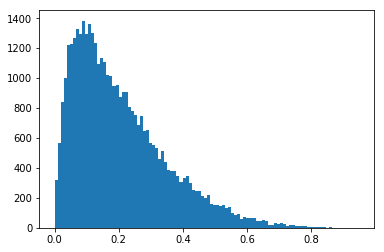

In [17]:
histo_e = plt.hist(e_beta, bins = 100)

In [18]:
histo_e

(array([3.180e+02, 5.650e+02, 8.430e+02, 1.002e+03, 1.223e+03, 1.229e+03,
        1.270e+03, 1.330e+03, 1.296e+03, 1.383e+03, 1.295e+03, 1.362e+03,
        1.303e+03, 1.234e+03, 1.092e+03, 1.132e+03, 1.109e+03, 1.018e+03,
        1.014e+03, 9.490e+02, 9.520e+02, 8.750e+02, 9.040e+02, 9.070e+02,
        8.080e+02, 7.780e+02, 7.500e+02, 6.880e+02, 7.450e+02, 6.450e+02,
        6.520e+02, 5.660e+02, 5.500e+02, 5.360e+02, 4.580e+02, 5.110e+02,
        4.380e+02, 3.880e+02, 3.810e+02, 3.800e+02, 3.490e+02, 3.070e+02,
        3.320e+02, 3.430e+02, 3.010e+02, 2.510e+02, 2.470e+02, 2.490e+02,
        2.140e+02, 1.990e+02, 2.160e+02, 1.600e+02, 1.490e+02, 1.530e+02,
        1.460e+02, 1.550e+02, 1.310e+02, 1.380e+02, 1.000e+02, 8.600e+01,
        9.300e+01, 5.600e+01, 7.300e+01, 6.800e+01, 6.600e+01, 6.400e+01,
        4.400e+01, 4.400e+01, 5.000e+01, 4.300e+01, 1.900e+01, 2.100e+01,
        3.300e+01, 2.300e+01, 3.500e+01, 2.600e+01, 1.400e+01, 1.600e+01,
        1.800e+01, 9.000e+00, 1.300e+0

In [22]:
x = np.linspace(0, 1, len(galaxies))

In [23]:
x.shape

(40000,)

In [24]:
histo_e[1].shape, histo_e[0].shape

((101,), (100,))

In [25]:
histo_e_x = np.zeros((100))
for i in range (len(histo_e[0])):
    histo_e_x[i] = (histo_e[1][i+1]+histo_e[1][i])/2

In [26]:
histo_e_x

array([0.00503046, 0.01450757, 0.02398468, 0.03346179, 0.0429389 ,
       0.05241601, 0.06189312, 0.07137023, 0.08084734, 0.09032445,
       0.09980156, 0.10927867, 0.11875578, 0.12823289, 0.13771   ,
       0.14718711, 0.15666422, 0.16614133, 0.17561844, 0.18509555,
       0.19457266, 0.20404977, 0.21352688, 0.22300399, 0.2324811 ,
       0.24195821, 0.25143532, 0.26091243, 0.27038954, 0.27986665,
       0.28934376, 0.29882087, 0.30829798, 0.31777509, 0.3272522 ,
       0.33672931, 0.34620642, 0.35568353, 0.36516064, 0.37463775,
       0.38411486, 0.39359197, 0.40306908, 0.41254619, 0.4220233 ,
       0.43150041, 0.44097752, 0.45045464, 0.45993175, 0.46940886,
       0.47888597, 0.48836308, 0.49784019, 0.5073173 , 0.51679441,
       0.52627152, 0.53574863, 0.54522574, 0.55470285, 0.56417996,
       0.57365707, 0.58313418, 0.59261129, 0.6020884 , 0.61156551,
       0.62104262, 0.63051973, 0.63999684, 0.64947395, 0.65895106,
       0.66842817, 0.67790528, 0.68738239, 0.6968595 , 0.70633

In [27]:
p_e = np.interp(x, histo_e_x, histo_e[0])

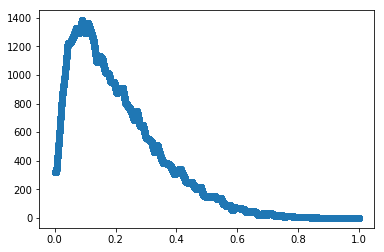

In [28]:
plt.plot(x, p_e, '-o')

In [67]:
np.save('/sps/lsst/users/barcelin/data/single/PSF_lsst_O.65/independant/weights_x', histo_e_x)

In [68]:
np.save('/sps/lsst/users/barcelin/data/single/PSF_lsst_O.65/independant/weights_y', histo_e[0])

Do same and save weights for training sample

In [29]:
import sklearn
from sklearn import preprocessing
import galsim

In [30]:
training_or_test = 'training'
data_dir = '/sps/lsst/users/barcelin/data/single/PSF_lsst_O.65/independant/' #+ training_or_test
root = 'galaxies_COSMOS'
count = 0

In [31]:
def compute_e (galaxies, count):
    PSF = galsim.Kolmogorov(fwhm=0.65)
    r_band = 6
    pix_scale = 0.2
    #final_epsf_image = PSF.drawImage(scale=0.2)

    psf_image = PSF.drawImage(nx=64, ny=64, scale=0.2)
    e = []
    error_list = []
    for i in range(len(galaxies)):
        try : 
            gal_image = galsim.Image(galaxies[i][0][r_band,:,:])
            gal_image.scale = pix_scale

            # Measurements of shapes
            res = galsim.hsm.EstimateShear(gal_image, psf_image)
            e_beta_in = [res.observed_shape.e]
            e.append(e_beta_in)
        except :
            print('erreur')
            count += 1
            error_list.append(i)
            pass
        continue
    return np.array(e), count, error_list

In [7]:
a = np.load('/sps/lsst/users/barcelin/data/single/PSF_lsst_O.65/independant/galaxies_COSMOS_1_v5_test.npy')

In [8]:
a.shape

(40000, 2, 10, 64, 64)

In [32]:
for i in range (7):
    galaxies = np.load(os.path.join(data_dir, root+'_{}_v5_test.npy'.format(i+1)))
    #galaxies = np.load(os.path.join(data_dir, root+'_val_v5_test.npy'.format(i+1)))
    
    # Compute e_beta
    e_beta_test, count, error_list = compute_e(galaxies, count)
    print(error_list)
    print(galaxies.shape)
    new_galaxies = np.delete(galaxies,error_list, axis = 0)
    print(new_galaxies.shape)
    
    # Save weights transform e_beta distribution in a uniform distribution
    weights = 1 / np.interp(e_beta_test, histo_e_x, histo_e[0])
    
    np.save(data_dir+str('e_beta_{}.npy'.format(i+1)),weights)
    #np.save(data_dir+str('e_beta_val_2.npy'.format(i+1)),weights)
    np.save(data_dir+str('images_cropped_{}.npy'.format(i+1)),new_galaxies)
    #np.save(data_dir+str('images_cropped_val.npy'.format(i+1)),new_galaxies)

erreur
[14683]
(40000, 2, 10, 64, 64)
(39999, 2, 10, 64, 64)
erreur
erreur
[476, 23558]
(40000, 2, 10, 64, 64)
(39998, 2, 10, 64, 64)
[]
(40000, 2, 10, 64, 64)
(40000, 2, 10, 64, 64)
erreur
erreur
[20838, 33792]
(40000, 2, 10, 64, 64)
(39998, 2, 10, 64, 64)
erreur
erreur
[9937, 31198]
(40000, 2, 10, 64, 64)
(39998, 2, 10, 64, 64)
[]
(40000, 2, 10, 64, 64)
(40000, 2, 10, 64, 64)
erreur
erreur
[1600, 11731]
(40000, 2, 10, 64, 64)
(39998, 2, 10, 64, 64)


In [26]:
a = np.load('/sps/lsst/users/barcelin/data/blended/COSMOS/PSF_lsst_0.65/uni11/training/e_beta_2.npy')

In [27]:
len(a)

999

In [31]:
print(a[:,0])

[0.31763527 0.19438878 0.82264529 0.48396794 0.85671343 0.76753507
 0.3987976  0.03306613 0.22244489 0.93086172 0.77154309 0.2254509
 0.02805611 0.09719439 0.91883768 0.1743487  0.24248497 0.89278557
 0.71142285 0.56713427 0.09018036 0.8987976  0.05310621 0.63627255
 0.02705411 0.38977956 0.6492986  0.11222445 0.63026052 0.40480962
 0.86472946 0.76152305 0.71643287 0.24549098 0.0240481  0.39278557
 0.5        0.16432866 0.96392786 0.65430862 0.27154309 0.47895792
 0.25551102 0.03206413 0.7755511  0.19338677 0.24448898 0.84368737
 0.75651303 0.35370741 0.998998   0.30961924 0.55811623 0.78857715
 0.84869739 0.83767535 0.50901804 0.40581162 0.44488978 0.2755511
 0.46993988 0.11923848 0.98496994 0.58016032 0.4248497  0.0501002
 0.82865731 0.49699399 0.93486974 0.39178357 0.32665331 0.9739479
 0.89378758 0.90280561 0.88276553 0.64328657 0.56813627 0.50701403
 0.07014028 0.3246493  0.44589178 0.01402806 0.81262525 0.43987976
 0.15531062 0.79258517 0.19639279 0.36873747 0.42685371 0.18837675

In [33]:
np.sum(a[:,0]/np.sum(a[:,0]))

1.0

In [30]:
print(a[1][0])

0.1943887775551102


In [161]:
count 

12

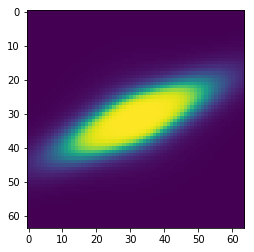

In [167]:
plt.imshow(galaxies[241][0][6])

Plot test

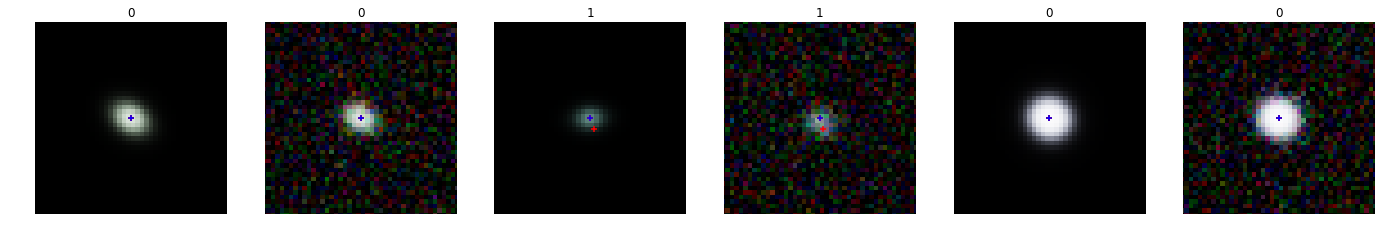

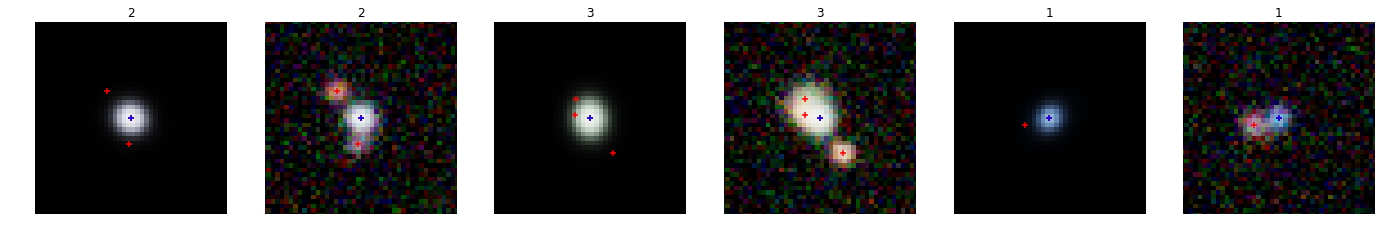

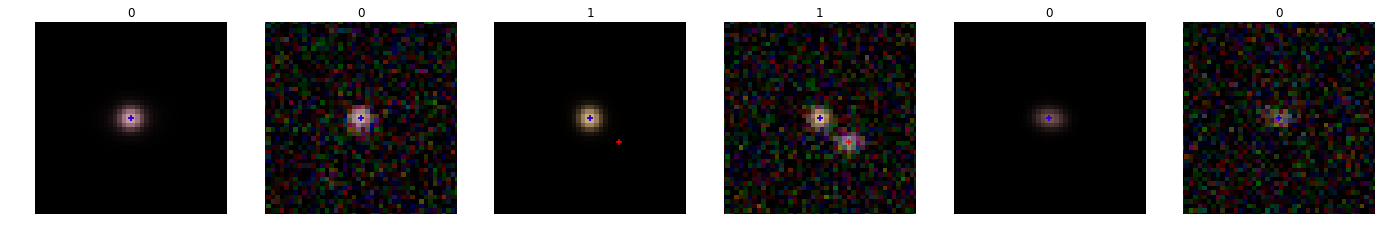

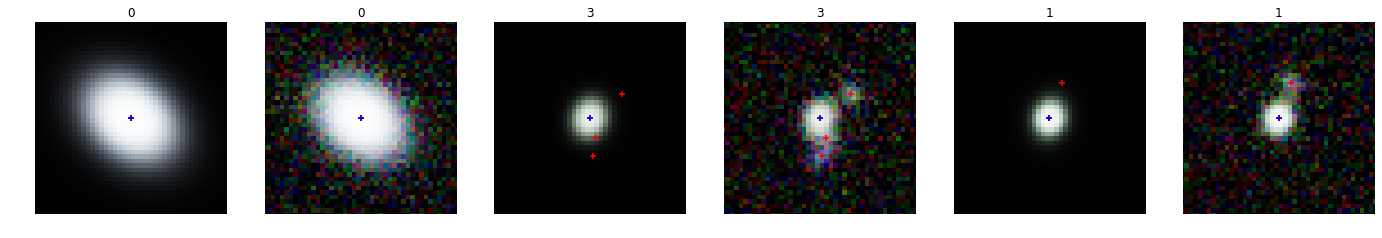

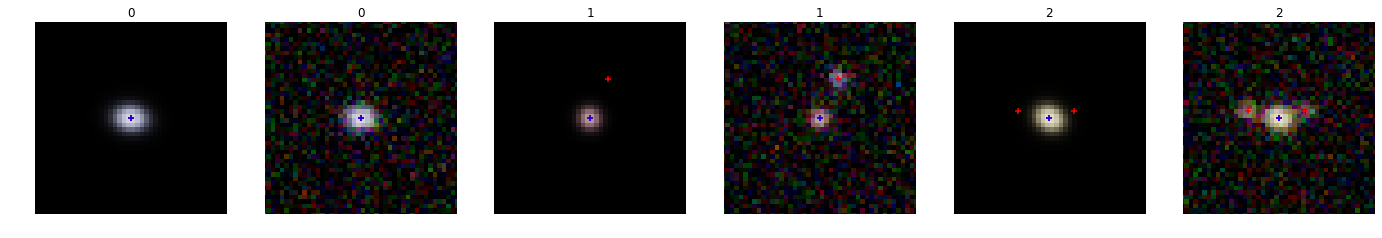

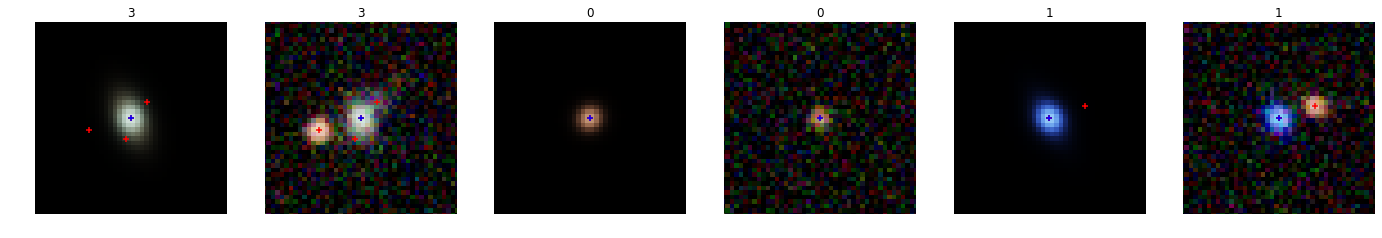

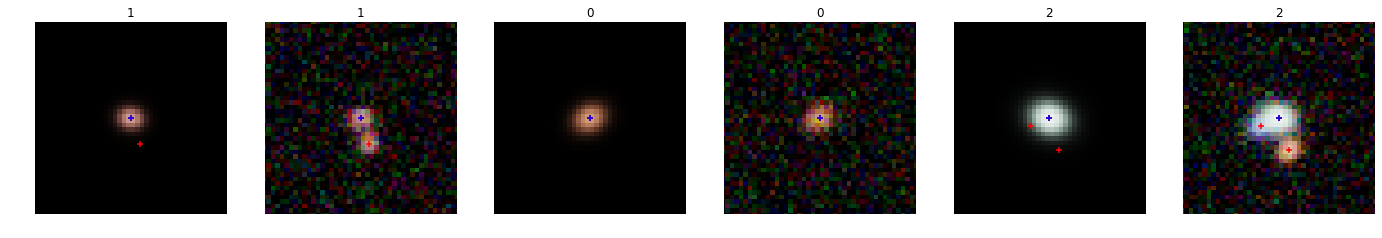

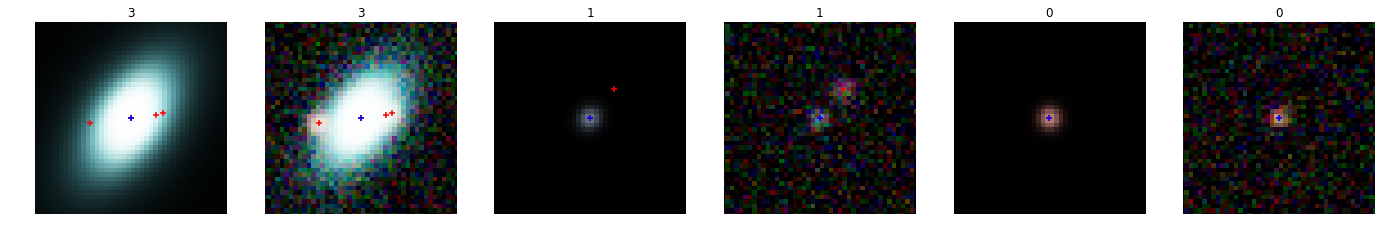

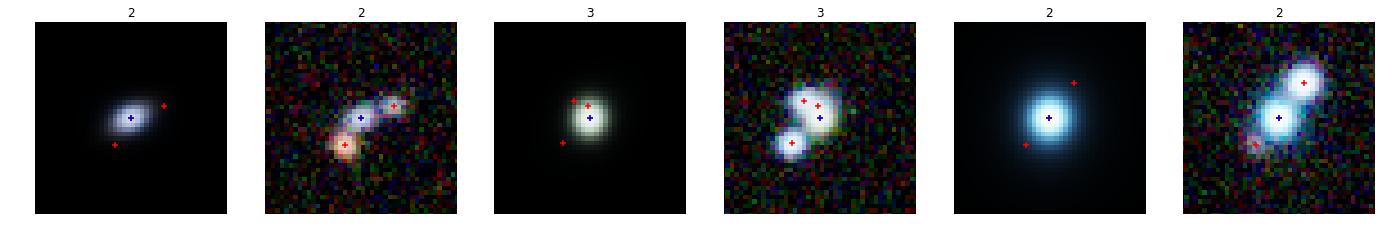

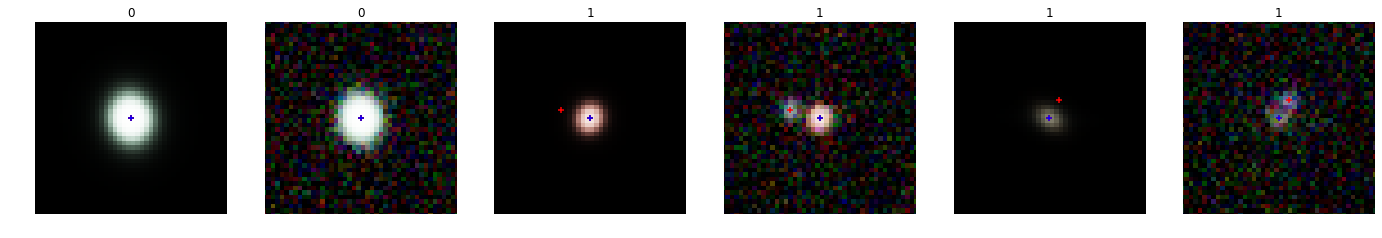

In [14]:
N = 10
pixel_scale_lsst = 0.2

for i in range(N):
    fig, axes = plt.subplots(1,6, figsize=(6*4,1*4))
    for j in range(3):
        idx = np.random.choice(range(len(galaxies)))
        for k in range(2):
            ax = axes[j*2+k]
            plot.plot_rgb(galaxies[idx][k], ax=ax, shifts=shifts[idx]/pixel_scale_lsst)
            ax.set_title(str(int(np.sum(shifts[idx]!=0.)/2)))

In [17]:
(15. * (6.68**2)/((2.4**2)*(1.-0.33**2))) * 100

13040.530430553998

In [18]:
(1800. * ((1.25)**2 - (0.37)**2)/((2.4**2)*(1.-0.33**2))) * 1


499.943889574683

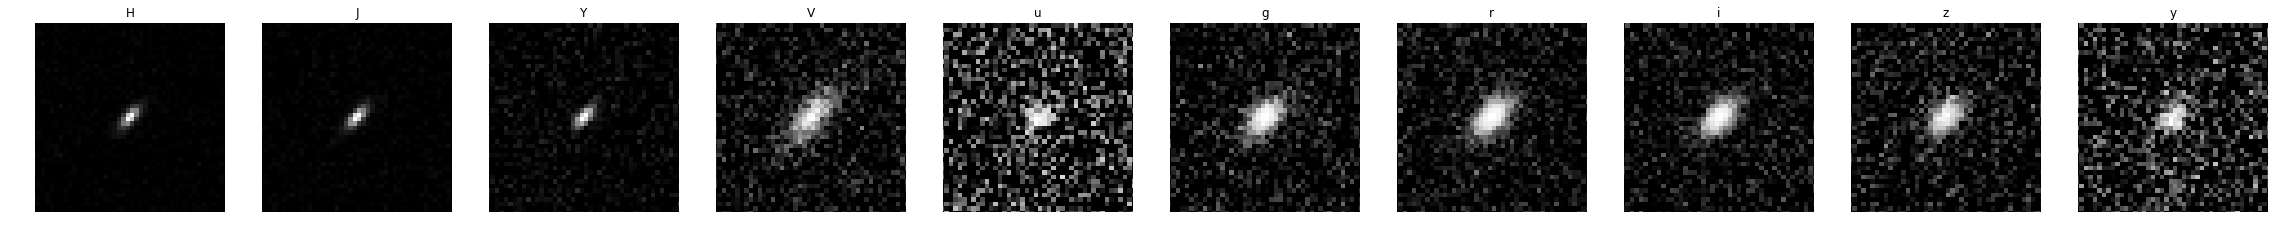

In [15]:
plot.plot_all_bands(galaxies[2,1], band_first=True, cmap=mpl.cm.gray)

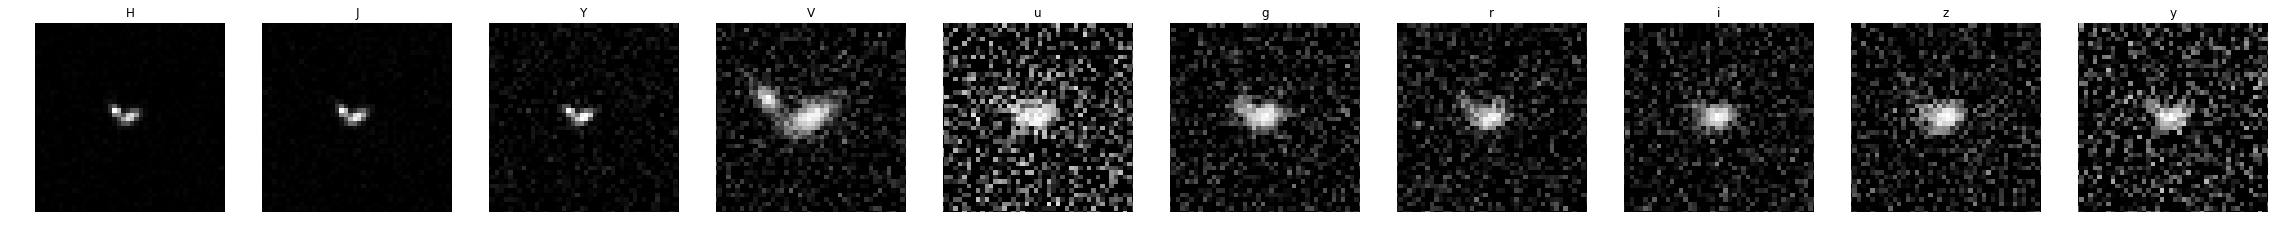

In [16]:
plot.plot_all_bands(galaxies[24,1], band_first=True, cmap=mpl.cm.gray)